# Project: Investigate a Dataset (TMD 5000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# loading data ...
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# checking info for df ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# viewing the data ...
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


#### Now that we have our data, we want to check for NaN values and clean our data ...

In [5]:
# using .isnull() then .sum() to figure out how many NaN values each column contains ...
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### We now see:
* imdb_id has 10.
* cast has 76.
* homepage has 7930.
* director has 44.
* tagline has 2824.
* keywords has 1493.
* overview has 4.
* genres has 23.
* production_companies has 1030.

### We now ask questions about the data and from there we determine which NaN values to get rid of:
* Which genre was the most common from year to year?
* Does runtime affect the movie's revenues?

### Now we choose which NaN values to drop in accordance with our questions:
* Looking at imdb_id, we notice that it is just the ids for the movies, which doesn't affect our analysis. Hence, we leave its NaN values.
* Looking at cast, it doesn't have an effect either. Like imdb_id, we leave its NaN values.
* Looking at homepage, it lists the homepages of the movies. We leave its NaN values.
* Looking at director, it lists the directors (obviously). We leave its NaN values.
* Looking at tagline, it lists the taglines (catchphrases), which aren't important to our analysis. We leave its NaN values.
* Looking at keywords, it lists key search words, again, not important to our analysis. We leave its NaN values.
* Looking at overview, it lists the summary and main theme of the movie. We leave its NaN values.
* Looking at genres, it lists the genres corresponding to the movies, we need those for our questions, so we drop its NaN values.
* Looking at production_companies, it lists the companies involved in the production of the movie. We leave its NaN values.

In [6]:
# dropping the rows for 'genre'
df.dropna(subset=['genres'], inplace = True)
# resetting the indicies ...
df.reset_index(inplace = True, drop = True)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10838,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10839,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10840,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10841,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [7]:
# running .isnull().sum() again to check ...
df.isnull().sum()

id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### We check for duplicates in our dataset ...

In [8]:
df.duplicated().sum()

1

In [9]:
# dropping duplicated rows ...
df.drop_duplicates(inplace=True)
df.reset_index(inplace = True, drop = True)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10838,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10839,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10840,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


<a id='eda'></a>
## Exploratory Data Analysis

## Now we answer our first question: 
#### Which genre was the most common from year to year?
##### First, we notice that genres has pipe-seperated values (ie, genre_0|genre_1|genre_2| ... |genre_n), so, we would like to seperate these values to be able to do operations and answer our question.
##### One way to do this is to make a series with all the seperated genres contained in a list. Once that's over, we want to create a new data frame with columns with the name of each genre, and then place 1 wherever the movie has a genre which is equal to the column's name, and leave a NaN wherever it isn't equal. Then we concatenate our original data frame and this new one.
##### We may find it helpful to define two functions for this process.

In [10]:
# defining a function to seperate all pipe-seperated values into a list ...
# col -> column to seperate values for
# char -> separating character

def seperate_into_series(col, char):
    return df[col].str.split(char)

In [11]:
# defining a function to make a new data frame with our series
# rows -> number of rows to iterate on
# col_list -> list containing desired column names (that are also the names we filter on)
# d_series -> the series that has the data

def df_new(rows, col_list, d_series):
    df_temp = pd.DataFrame(index = range(0, rows), columns = col_list)
    for i in range(0, rows):
        list_temp = d_series[i]
        for j in col_list:
            for k in range(0, len(list_temp)):
                if list_temp[k] == j:
                    df_temp.at[i, j] = 1
    return df_temp

##### Now we desire to find what the list of all genres (col_list) is. An approach to this is we could form a dictionary that adds a genre as the key. Then we do list( dict.keys() ) to get a list of all the keys (genres in this case).

##### We may find it helpful to define this as a function

In [12]:
# defining a function to get the list of columns ...
# rows -> number of rows to iterate on
# d_series -> the series that has the data

def col_list(rows, d_series):
    dict_temp = {}
    for i in range(0, rows):
        list_temp = d_series[i]
        for j in range(0, len(list_temp)):
            if not list_temp[j] in dict_temp:
                dict_temp[list_temp[j]] = 1
    return list(dict_temp.keys())

#### Now we are ready to answer our first question:

In [13]:
# first we seperate the data into a series ...
series_1a = seperate_into_series('genres', '|')

In [14]:
# second we run col_list() to obtain a list of all genres.
list_1a = col_list(10842, series_1a)

In [15]:
# third we create our dataframe ...
df_1a = df_new(10842, list_1a, series_1a)

In [16]:
# we now concatenate df and df_1 ...
df = pd.concat([df, df_1a], axis = 1)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie,Foreign
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
10838,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10839,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10840,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# we now want to know the range of years, which is simple ...
print(f'Maximum year is {df["release_year"].max()}')
print(f'Minimum year is {df["release_year"].min()}')
# now we create a list with all years in between (including the max and min) ...
list_years = []
for i in range(1960, 2015 + 1):
    list_years.append(i)

Maximum year is 2015
Minimum year is 1960


In [18]:
# defining a function ...
# col1 -> column to group by
# col2 -> column to get values for
# list_val -> list of values which match the values of **unique** col1

def df_part(col1, col2, list_val):
    df_temp = pd.DataFrame(df.groupby(col1)[col2].value_counts().sort_index(ascending = True))
    list_temp = list(df_temp.index.get_level_values(0))
    dict_temp = {}
    for i in list_val:
        # safety check.
        if i in list_temp:
            dict_temp[i] = df_temp[col2][i][1]
    return pd.DataFrame(dict_temp, index = [col2]).T

##### In the following 2 lines of code, we plot all the plots into one cell window. The reader is encouraged to make the window larger for ease of viewing. These plots show the trend of each genre with each passing year. We see that most of the genres follow an increasing trend as we tend to the right side of the graph, only going down a bit at 2015 sometimes. 

##### We present our answer for this question in the cell after the following one.

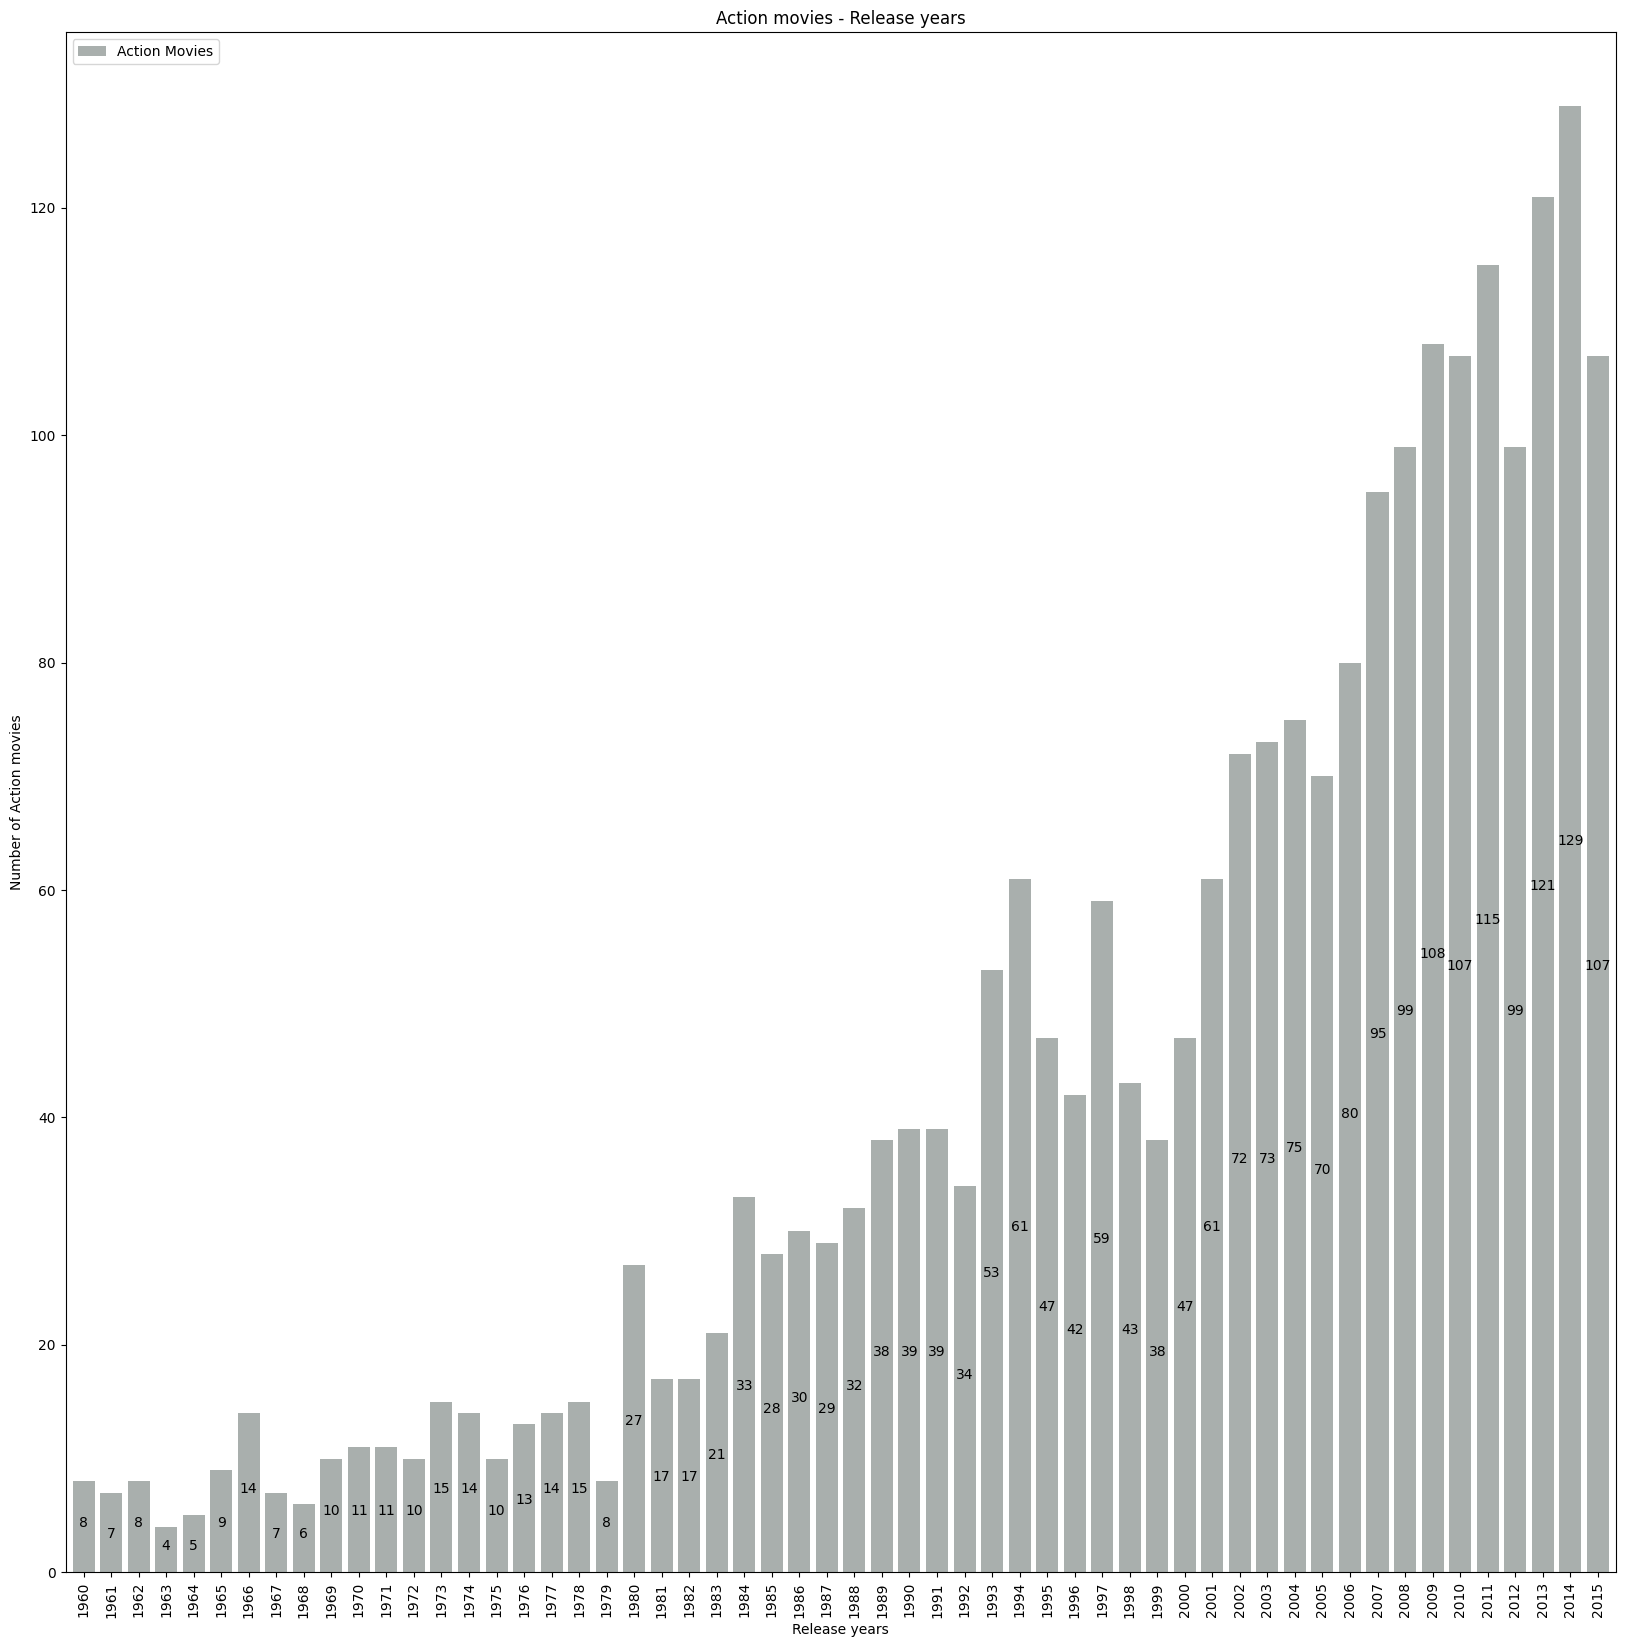

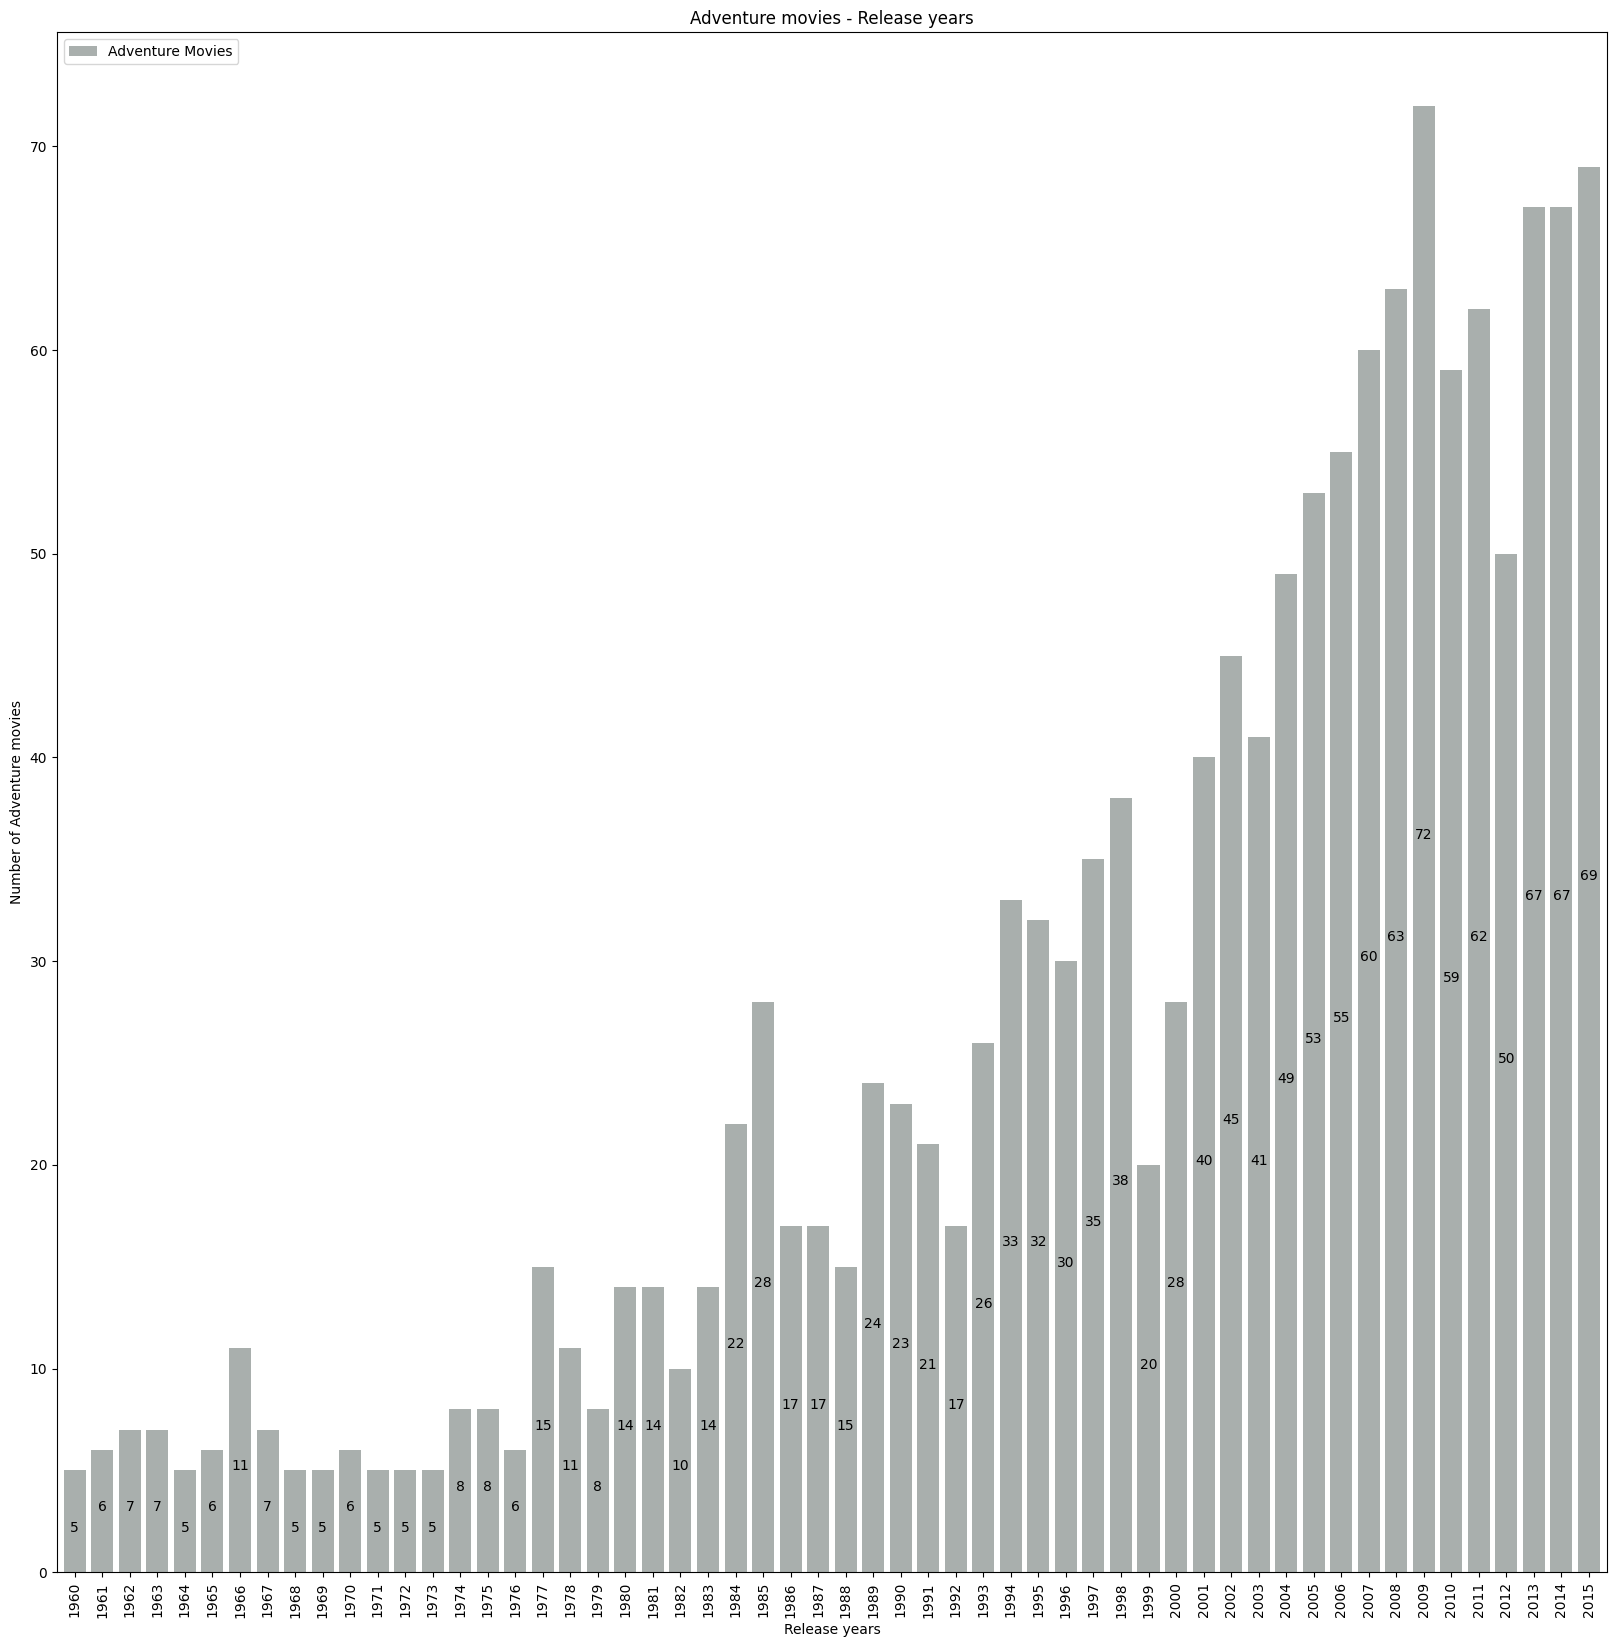

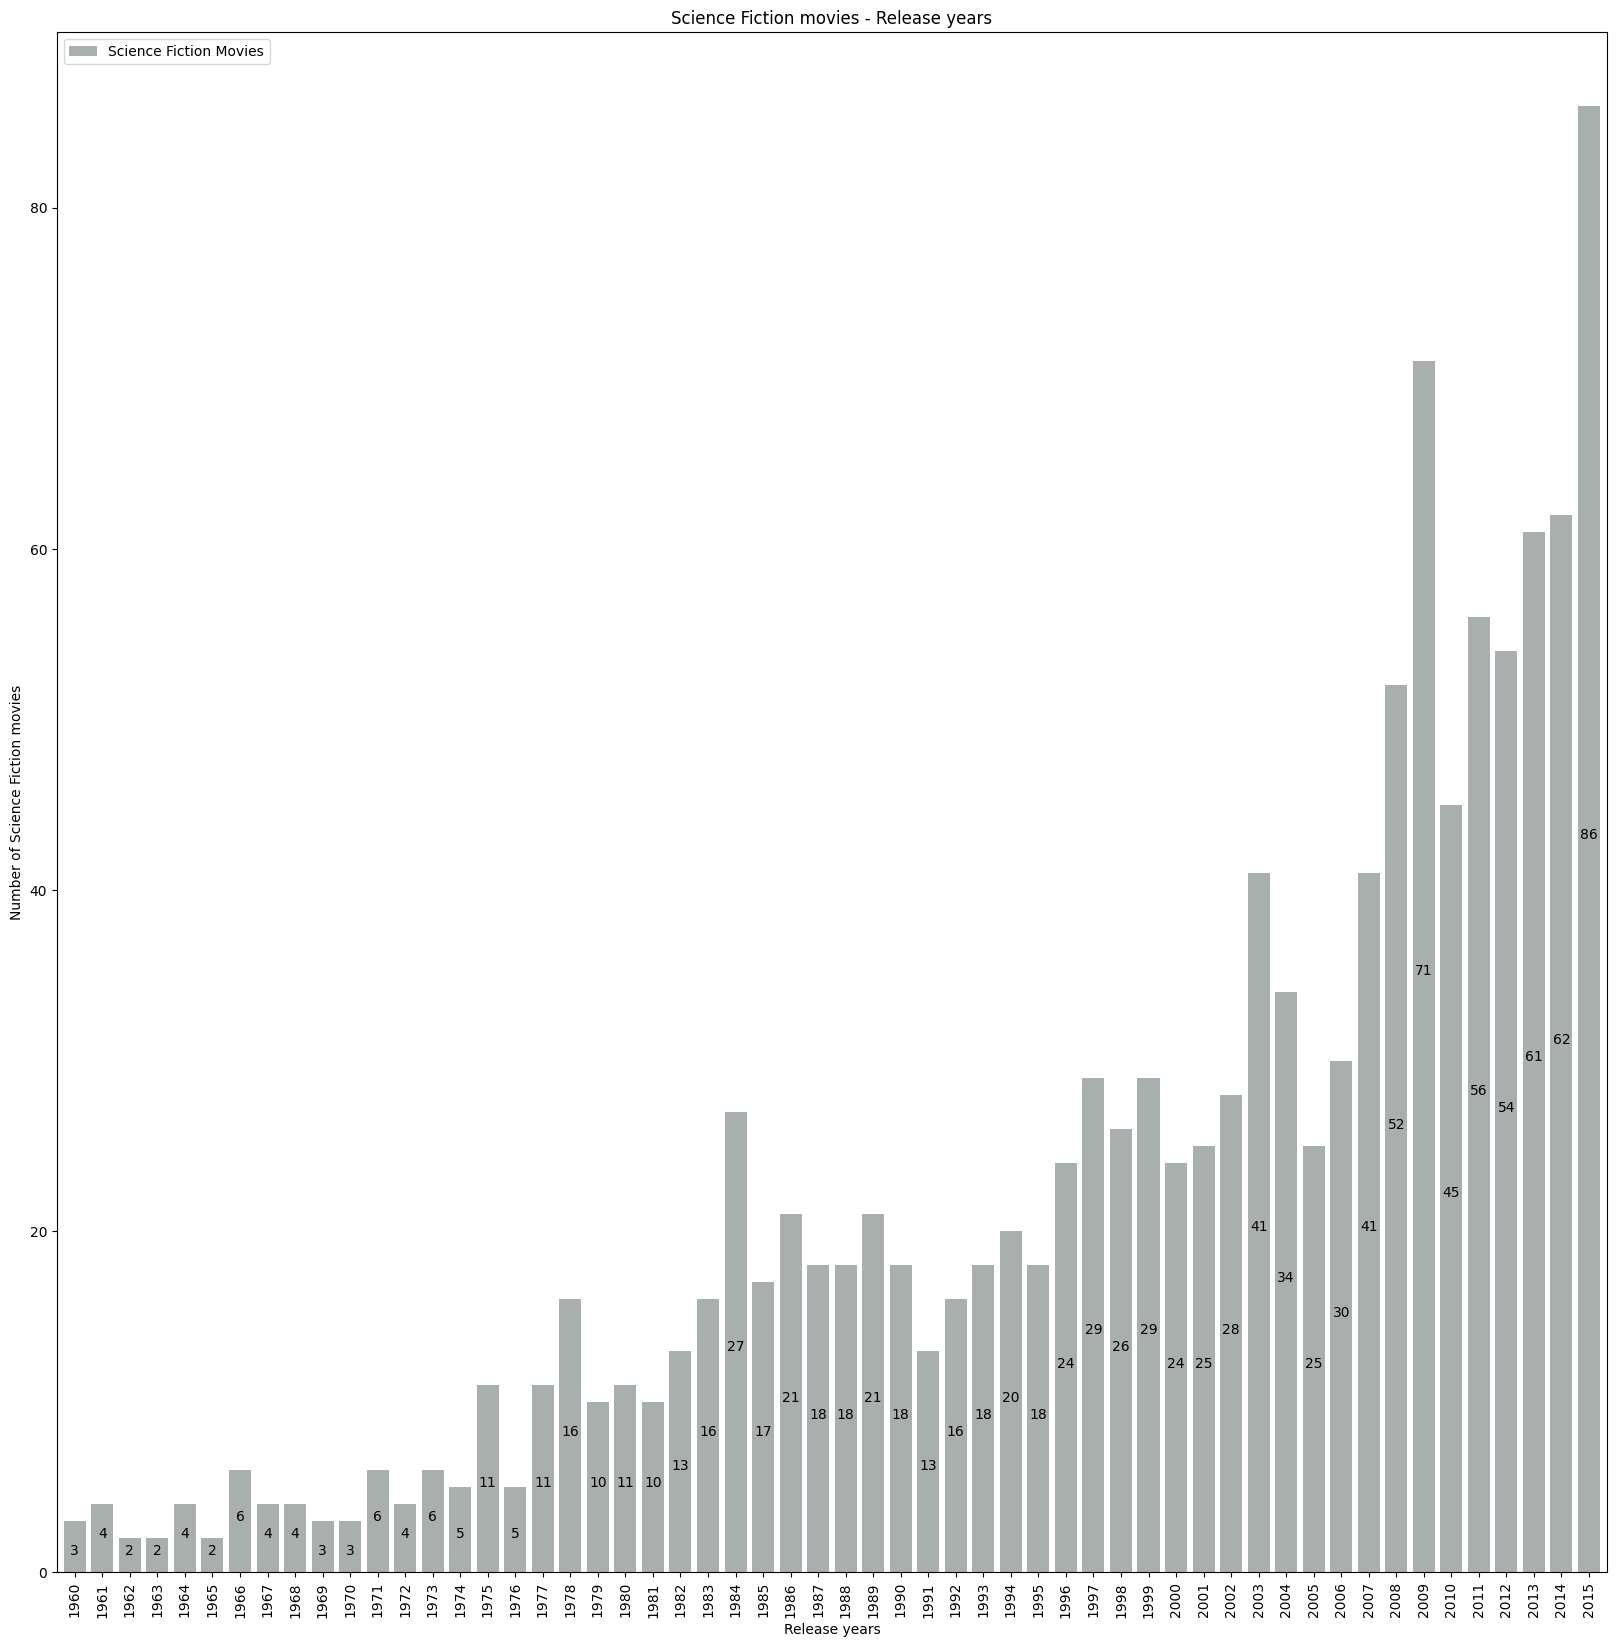

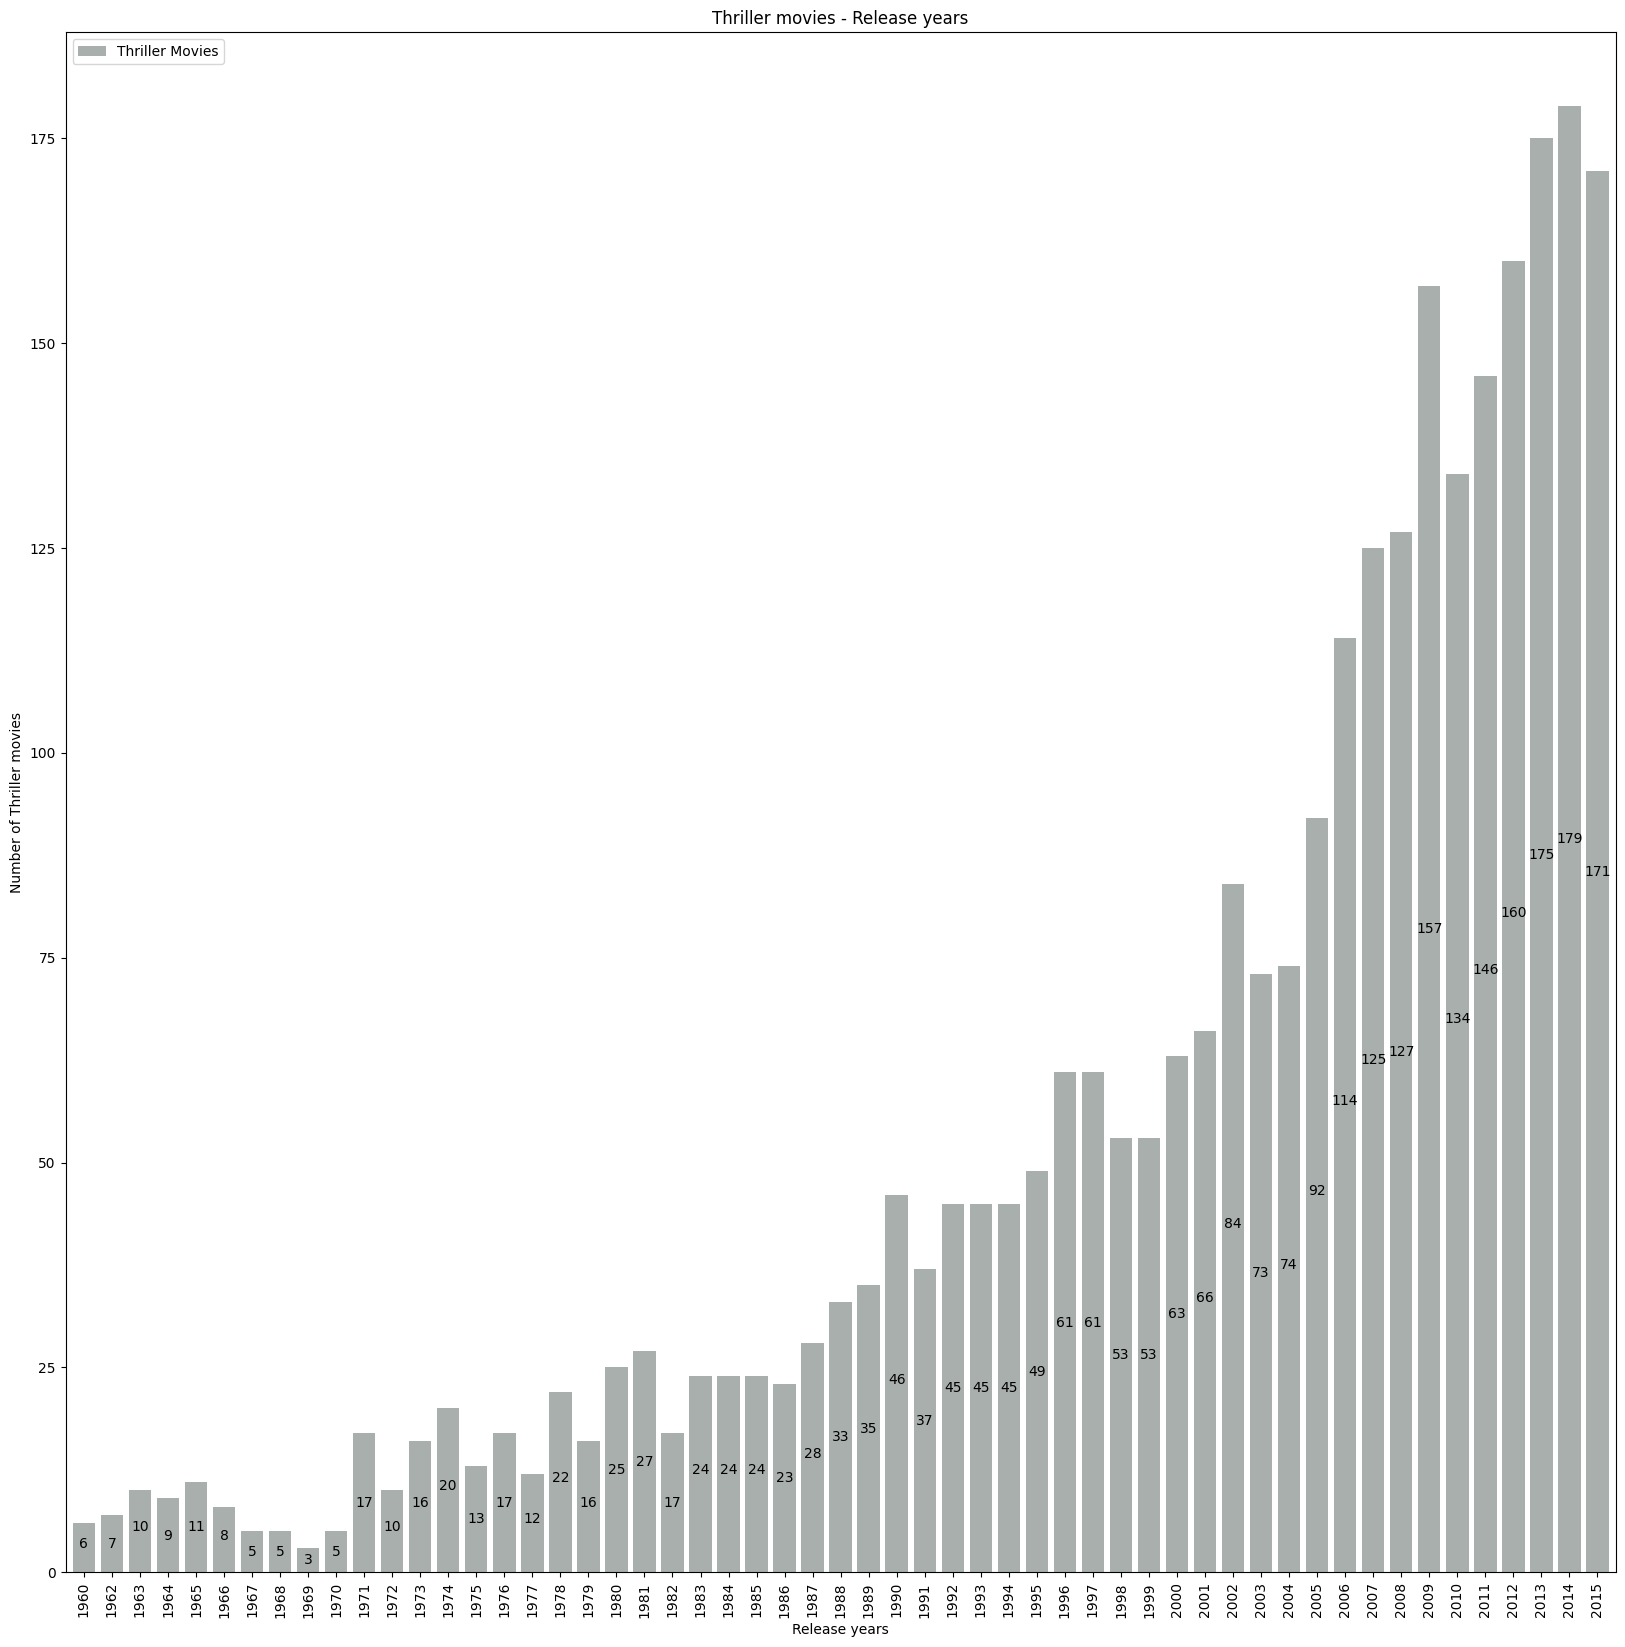

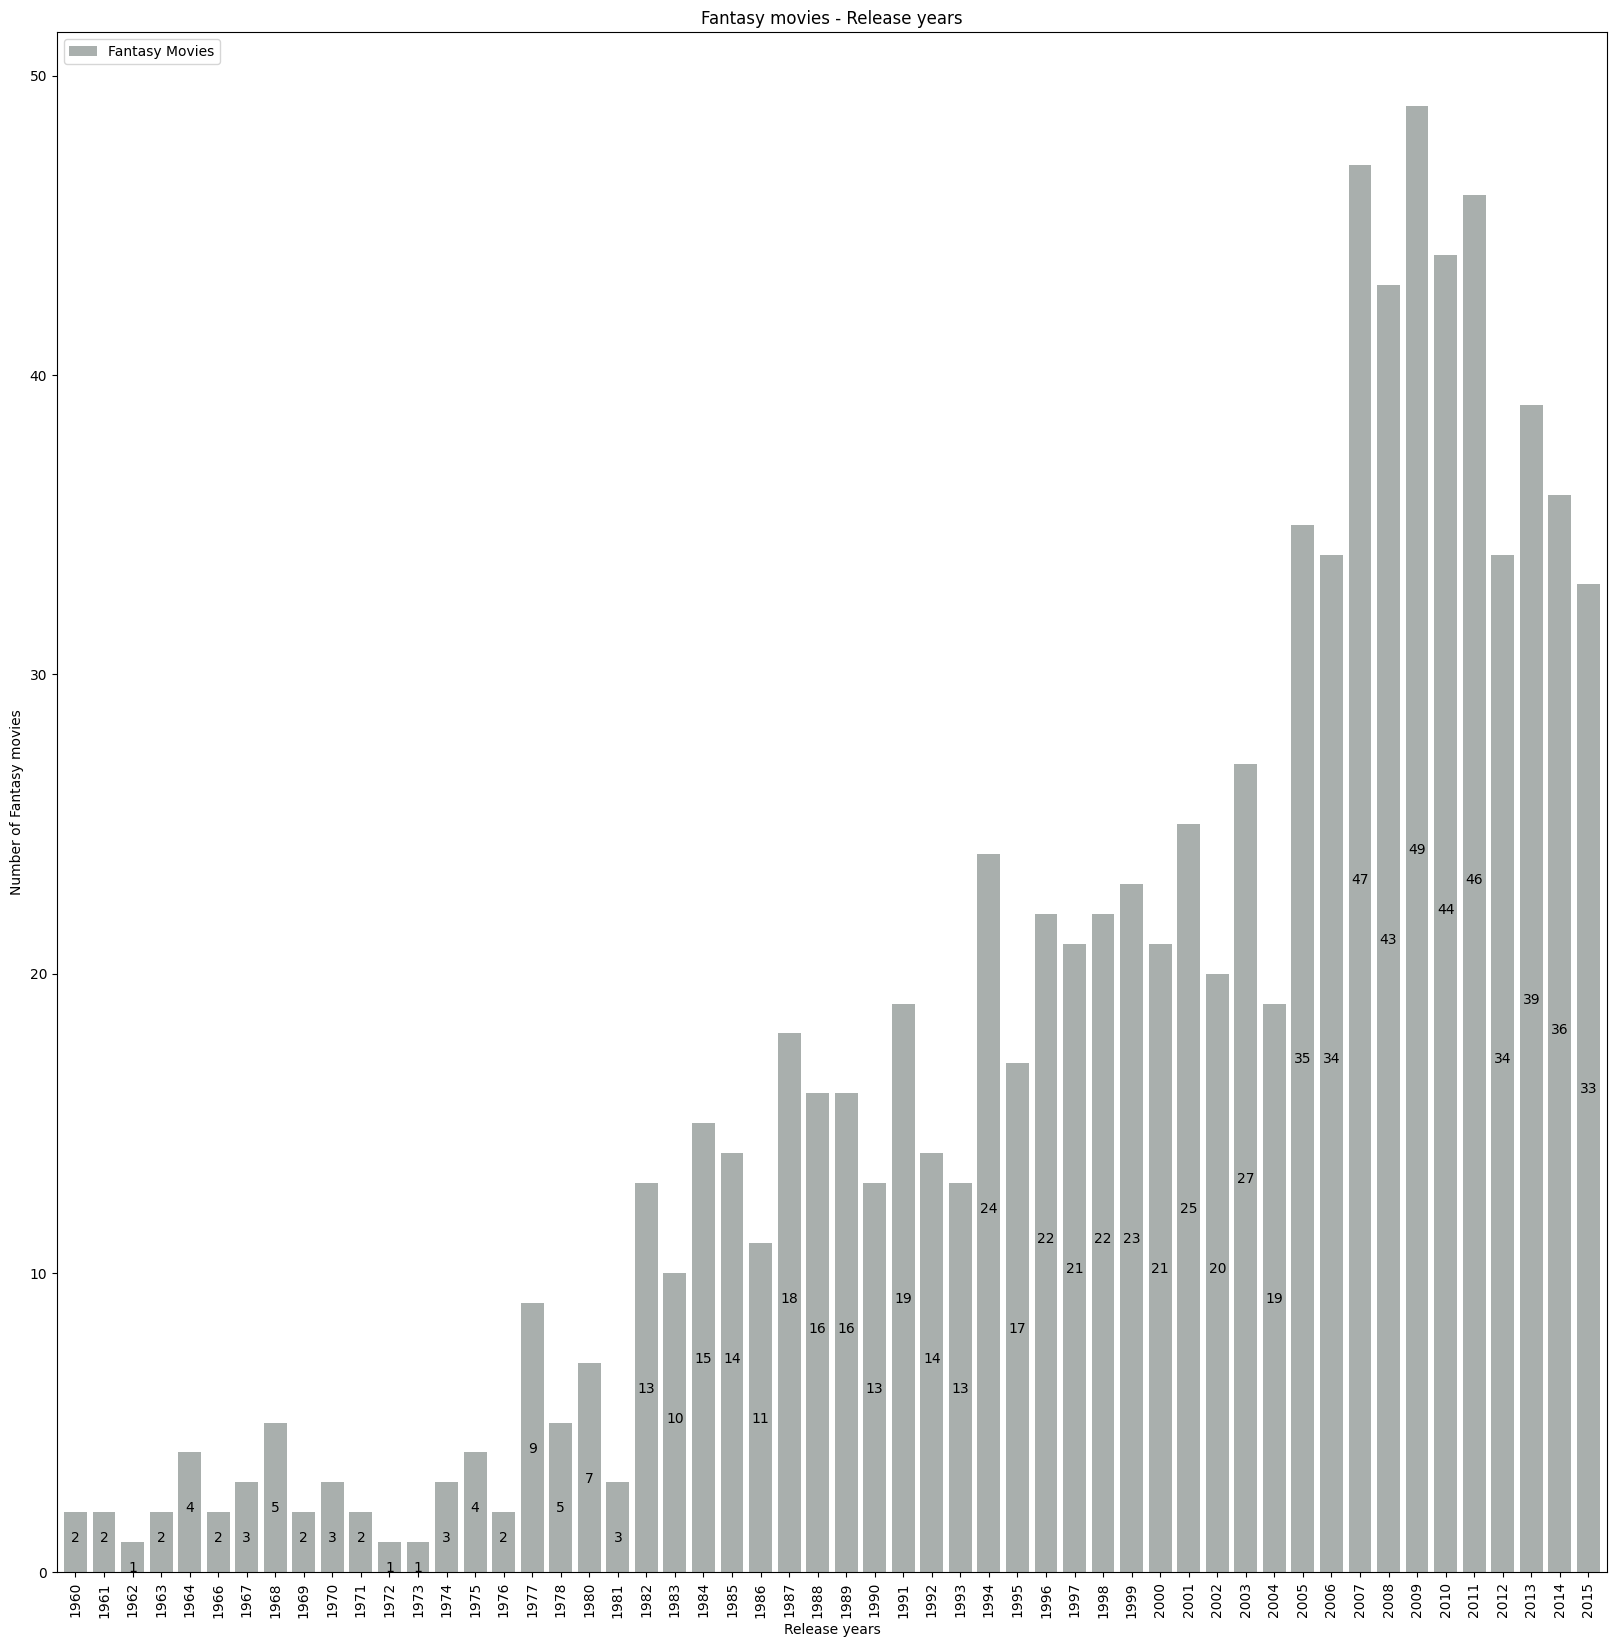

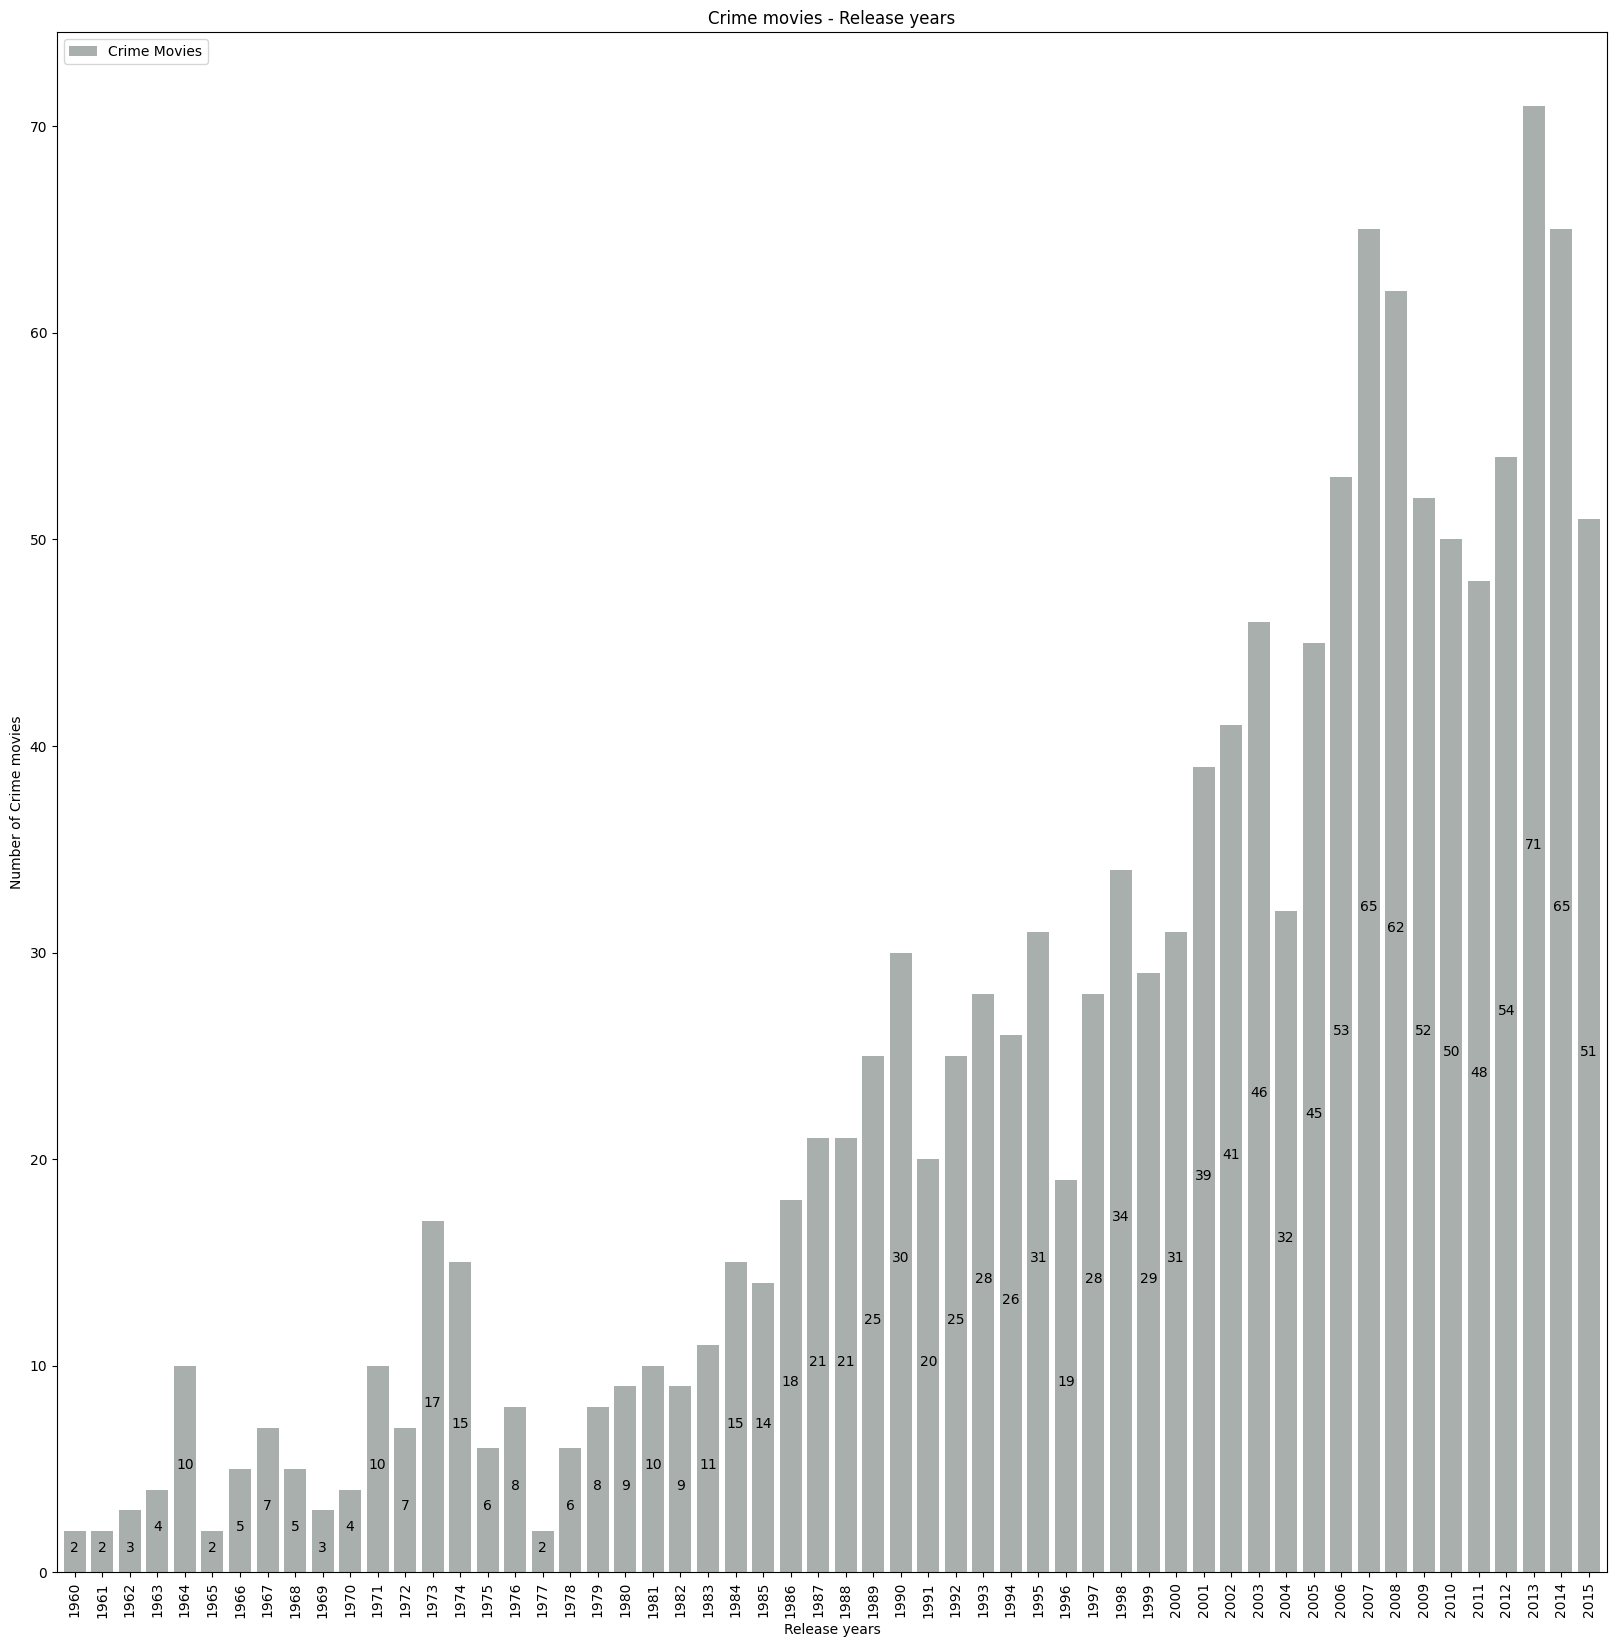

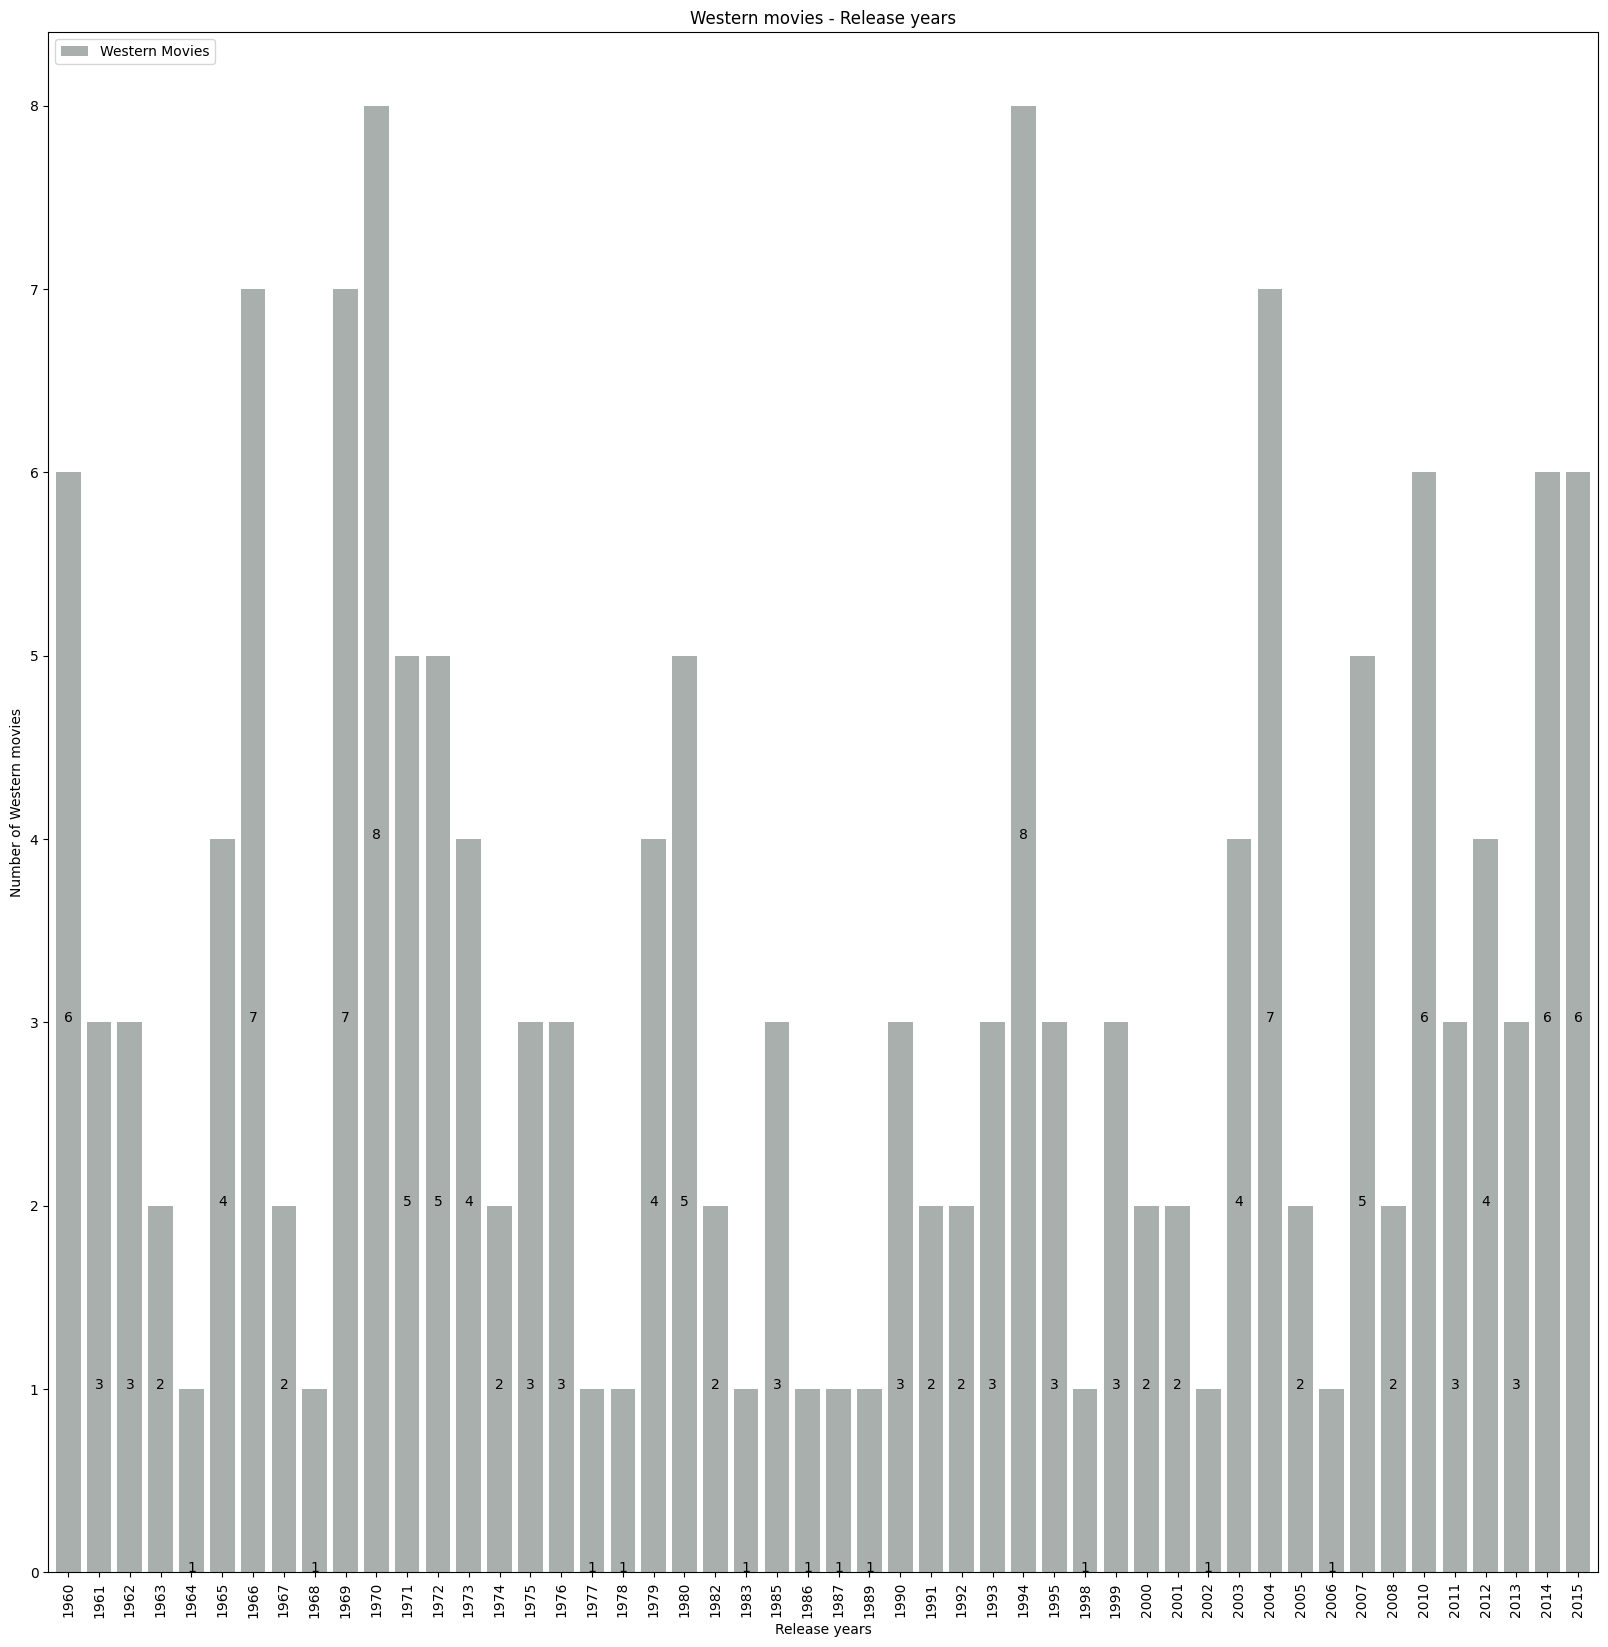

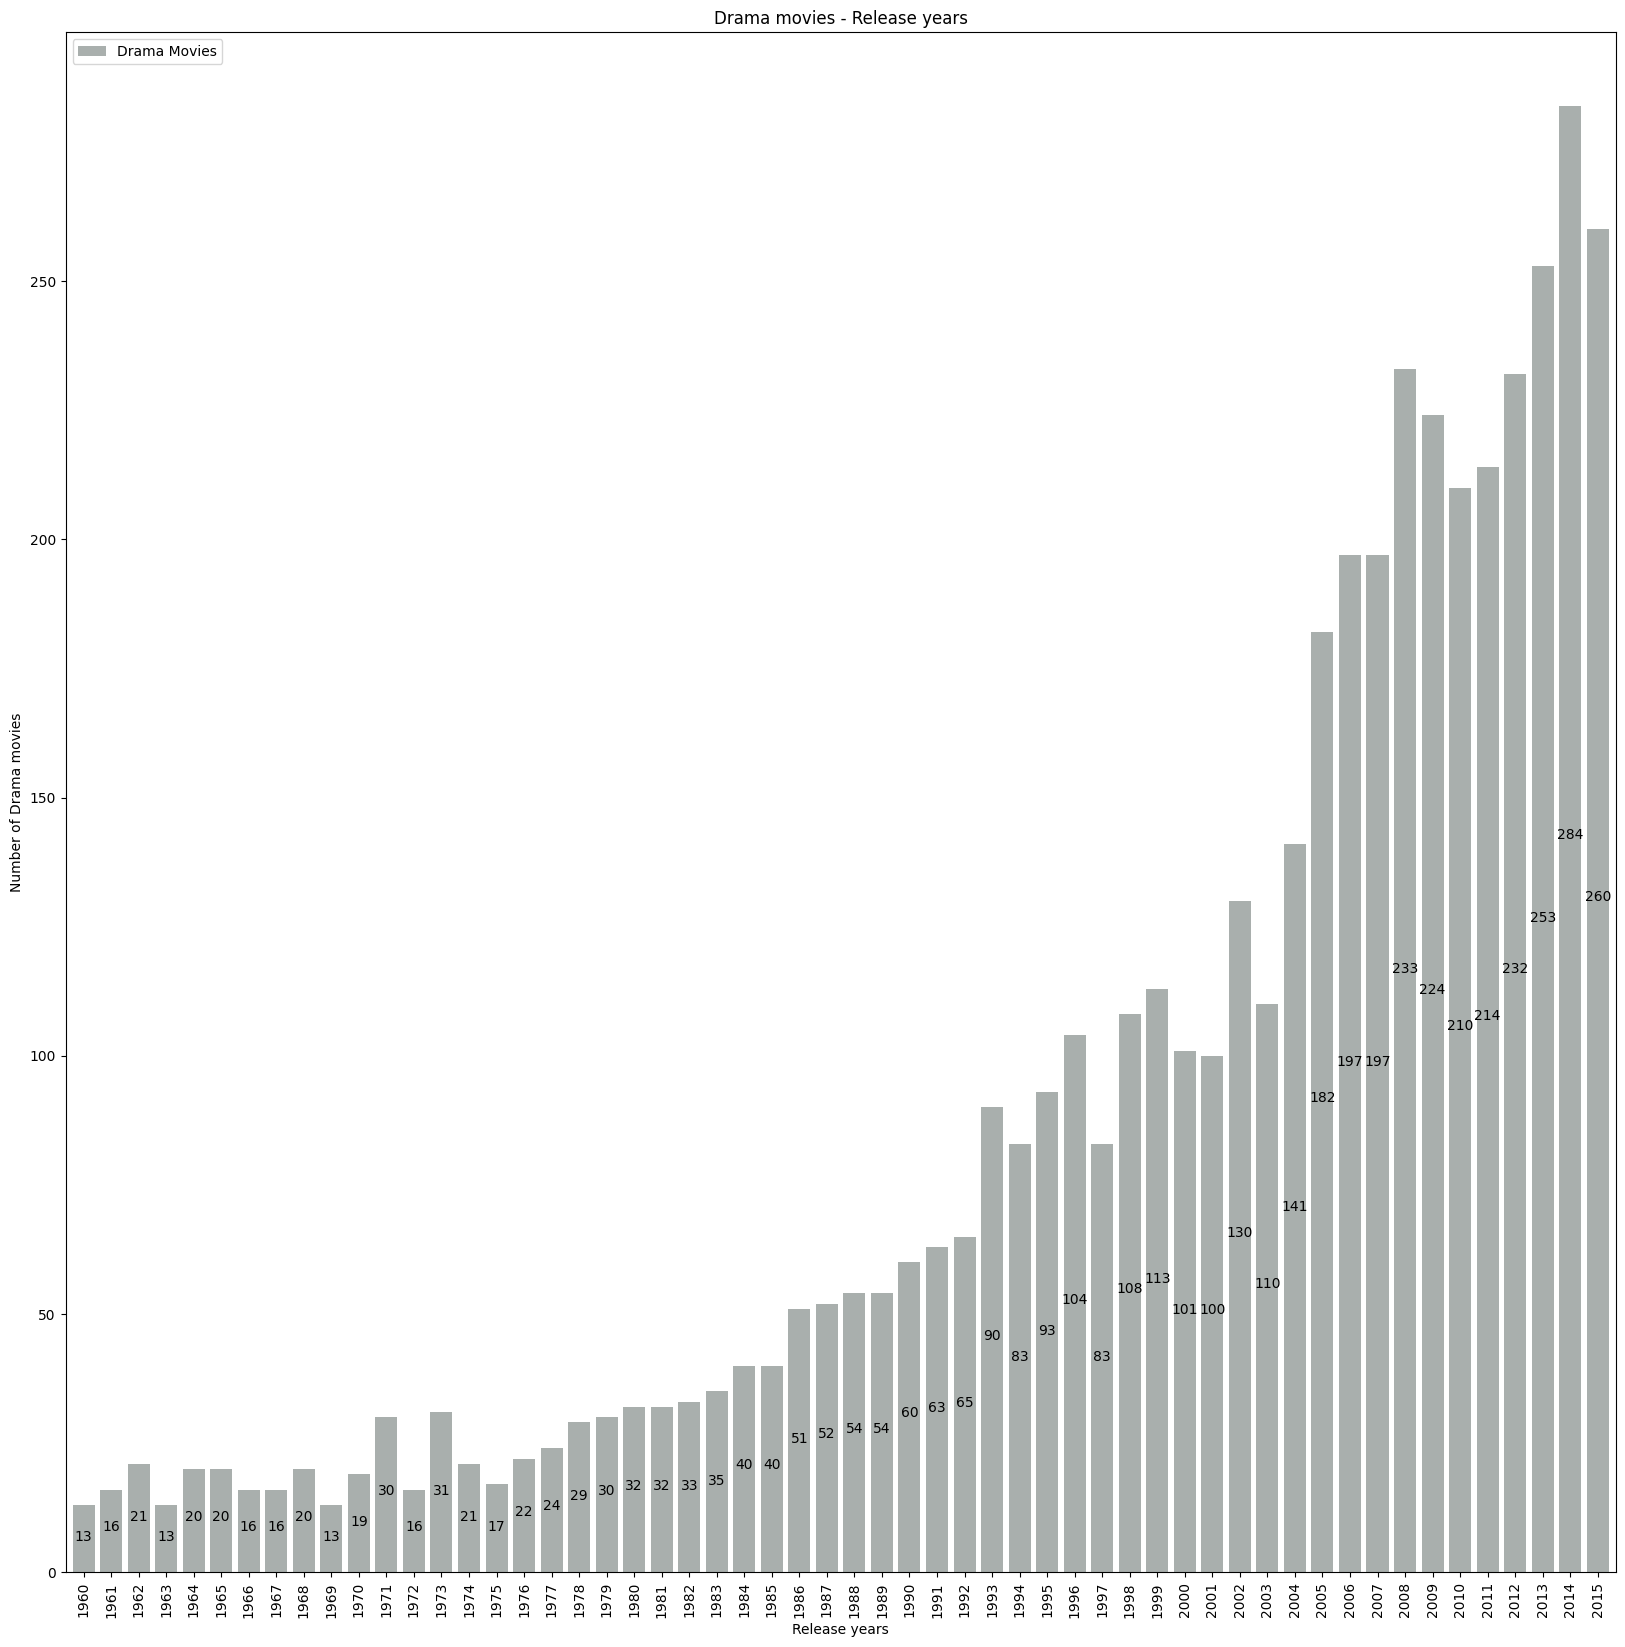

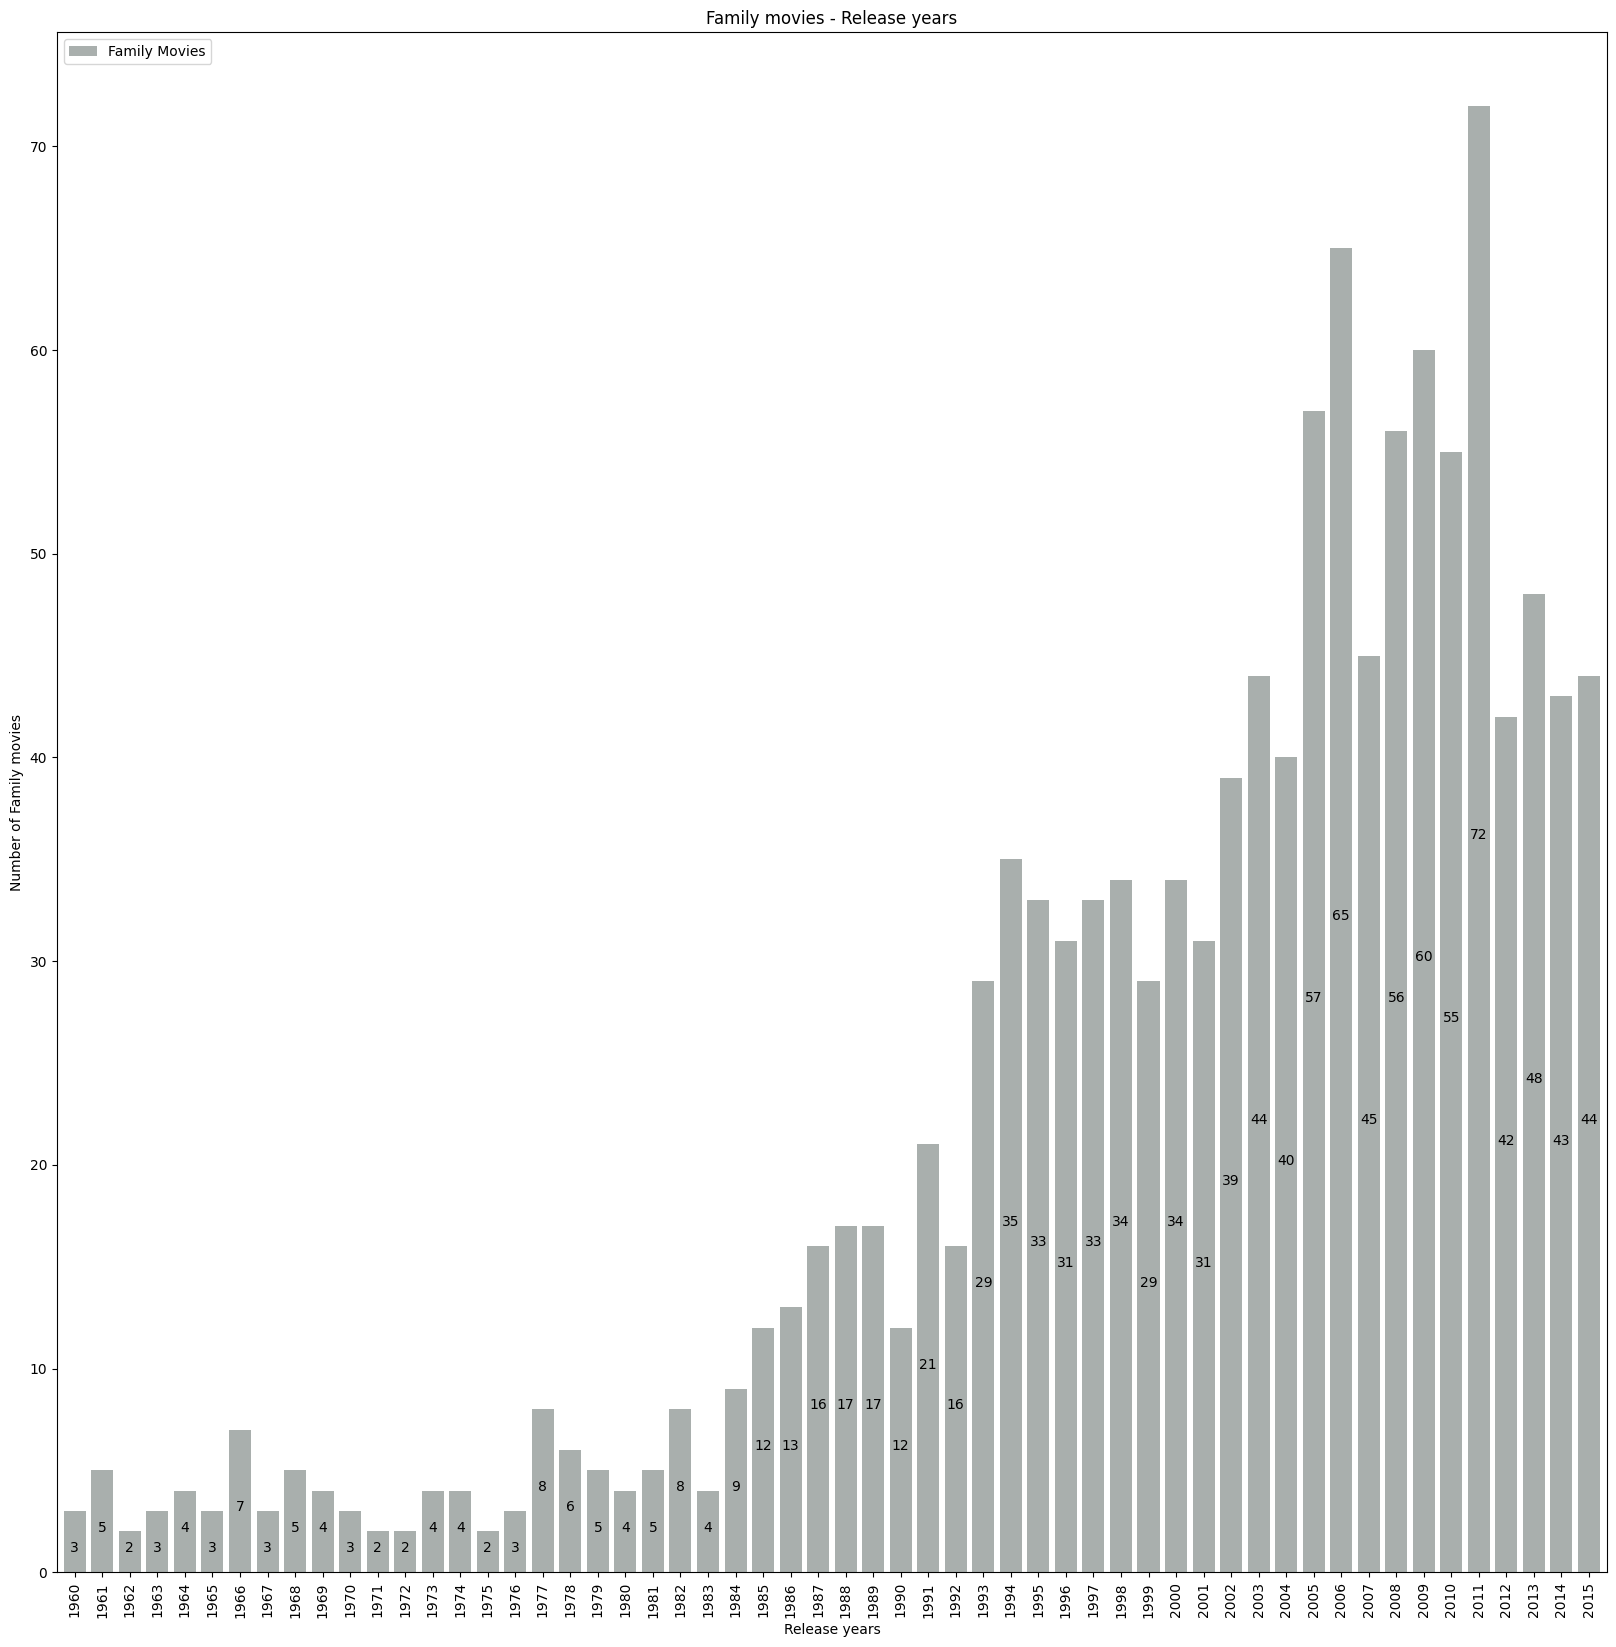

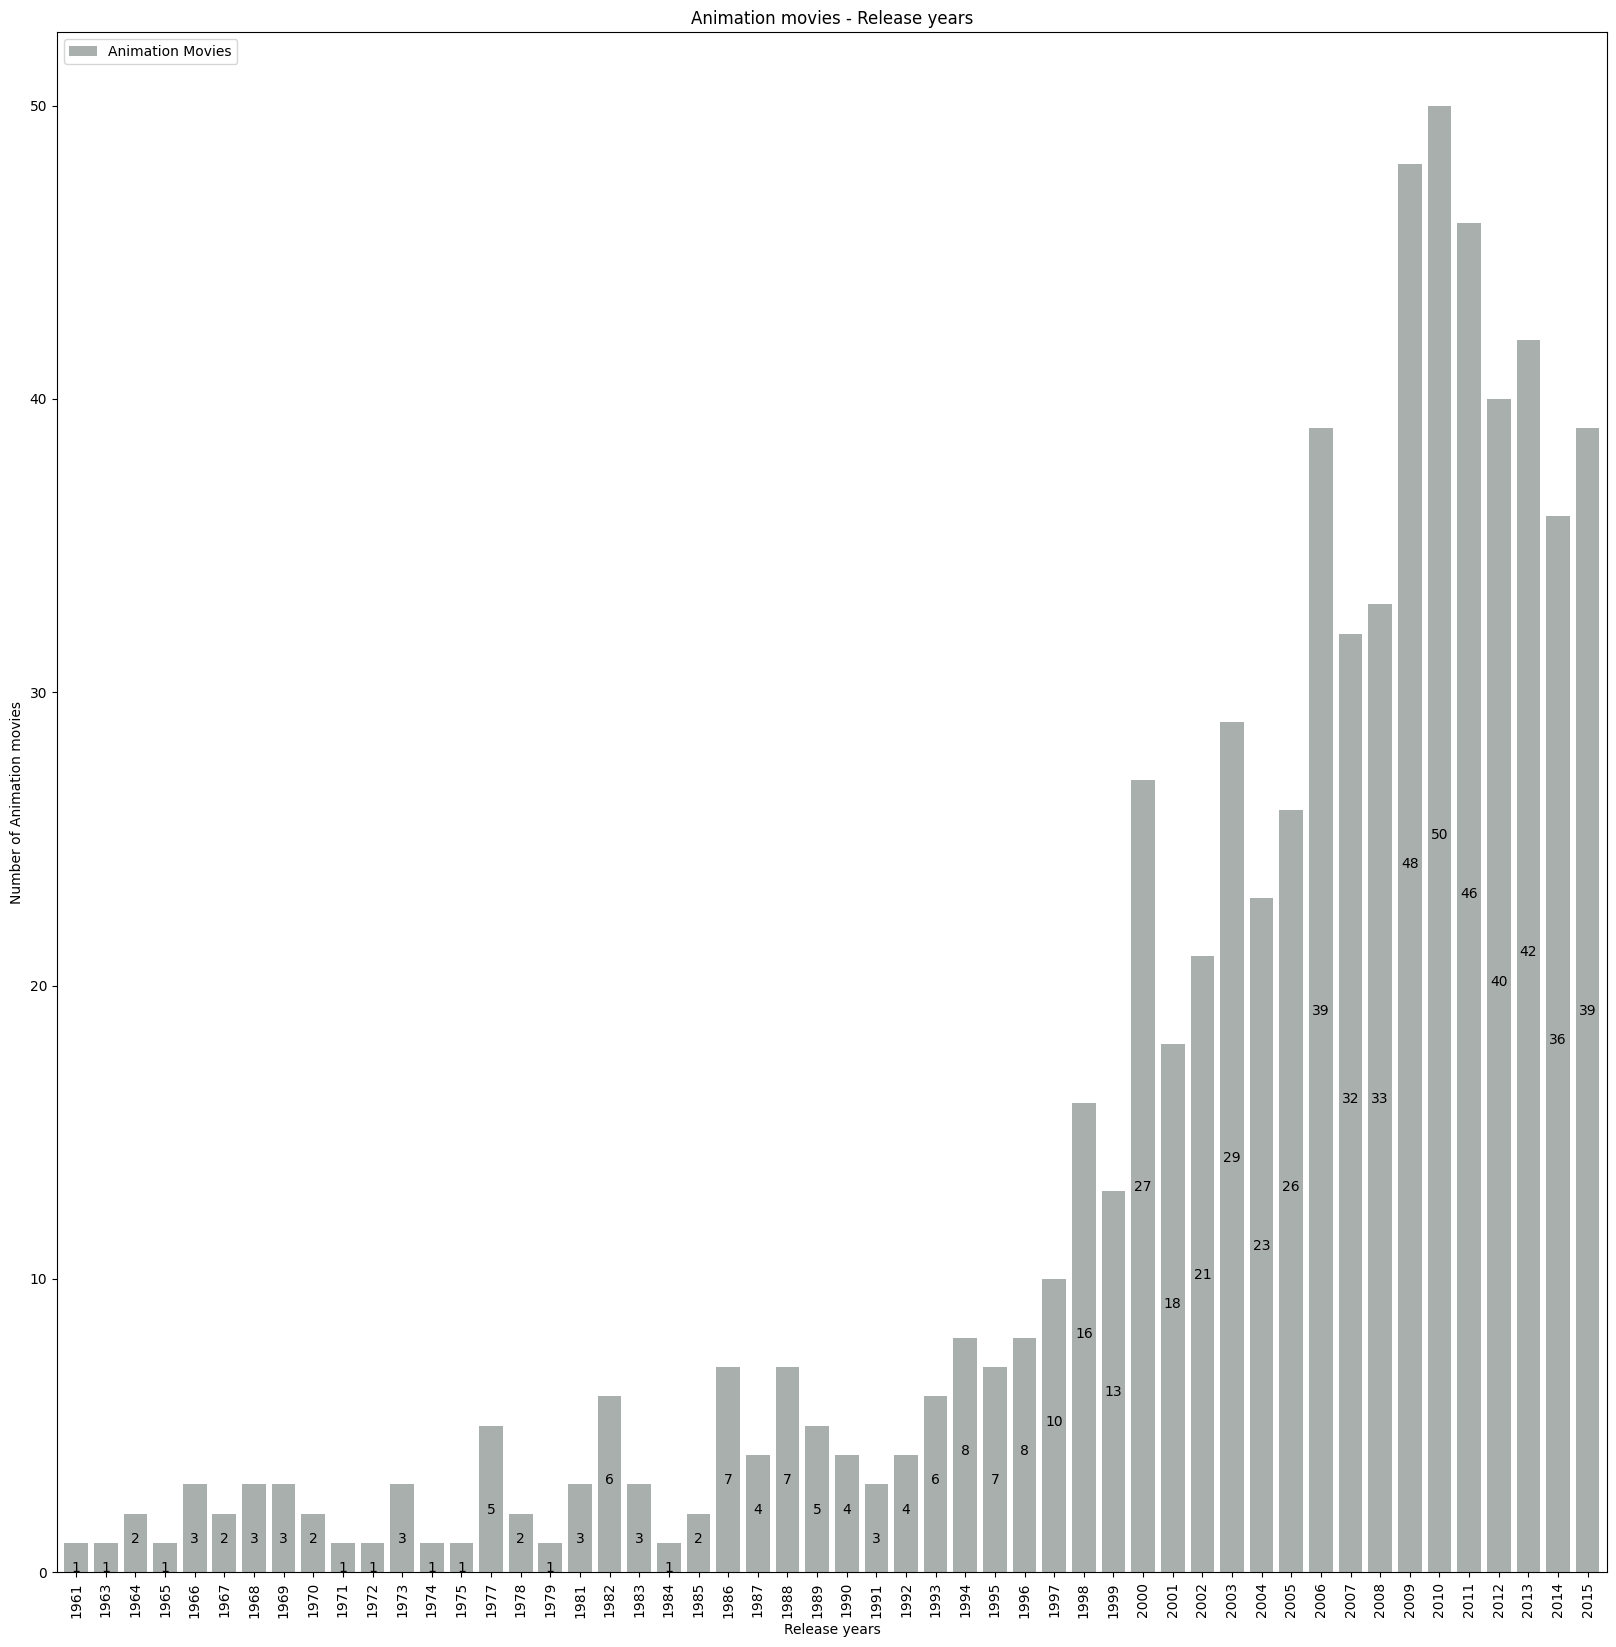

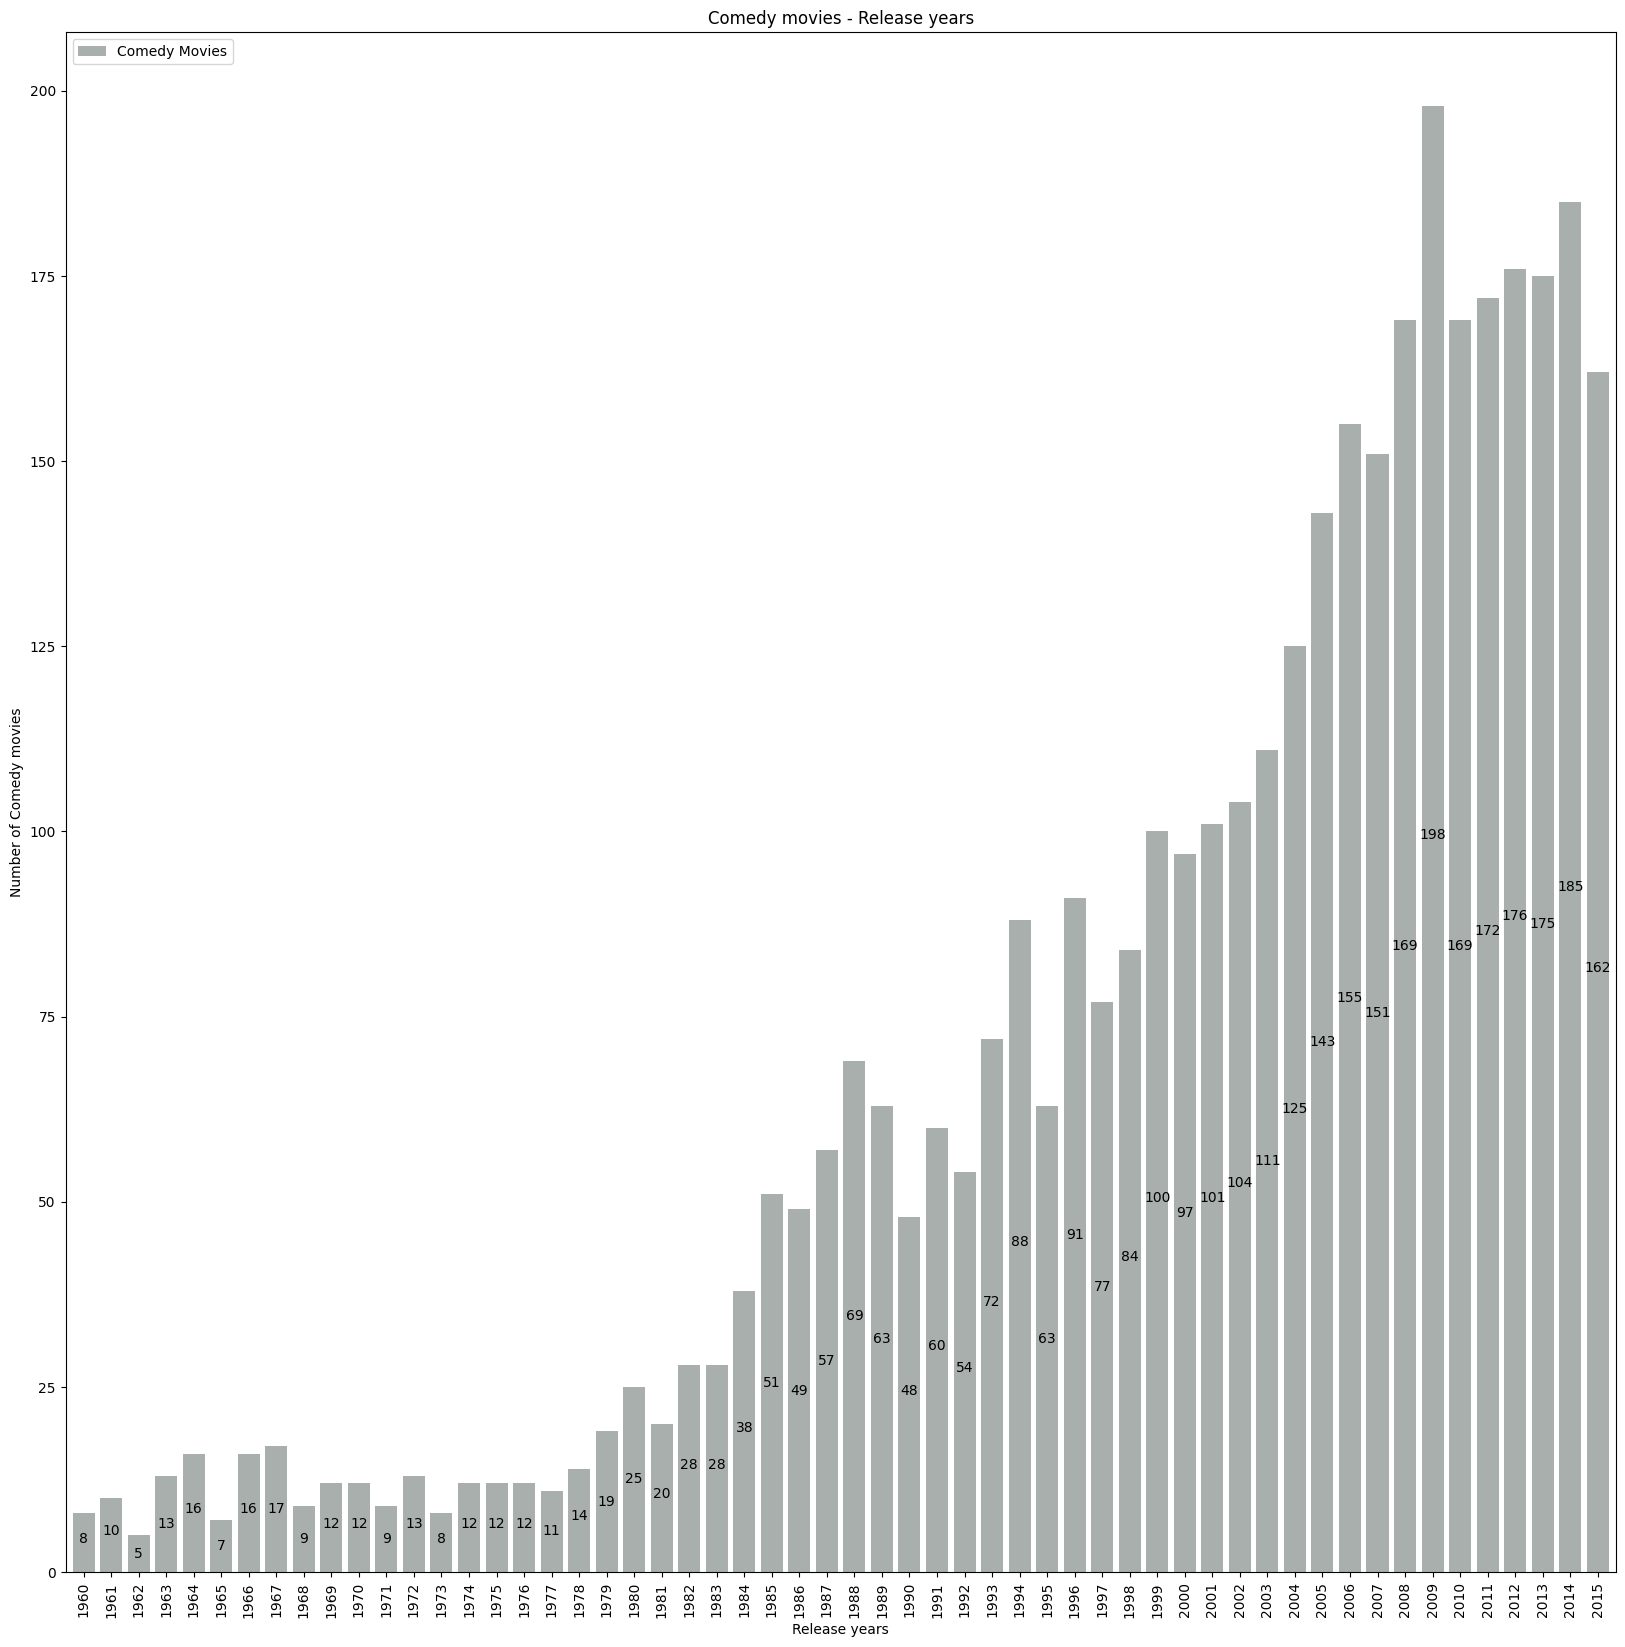

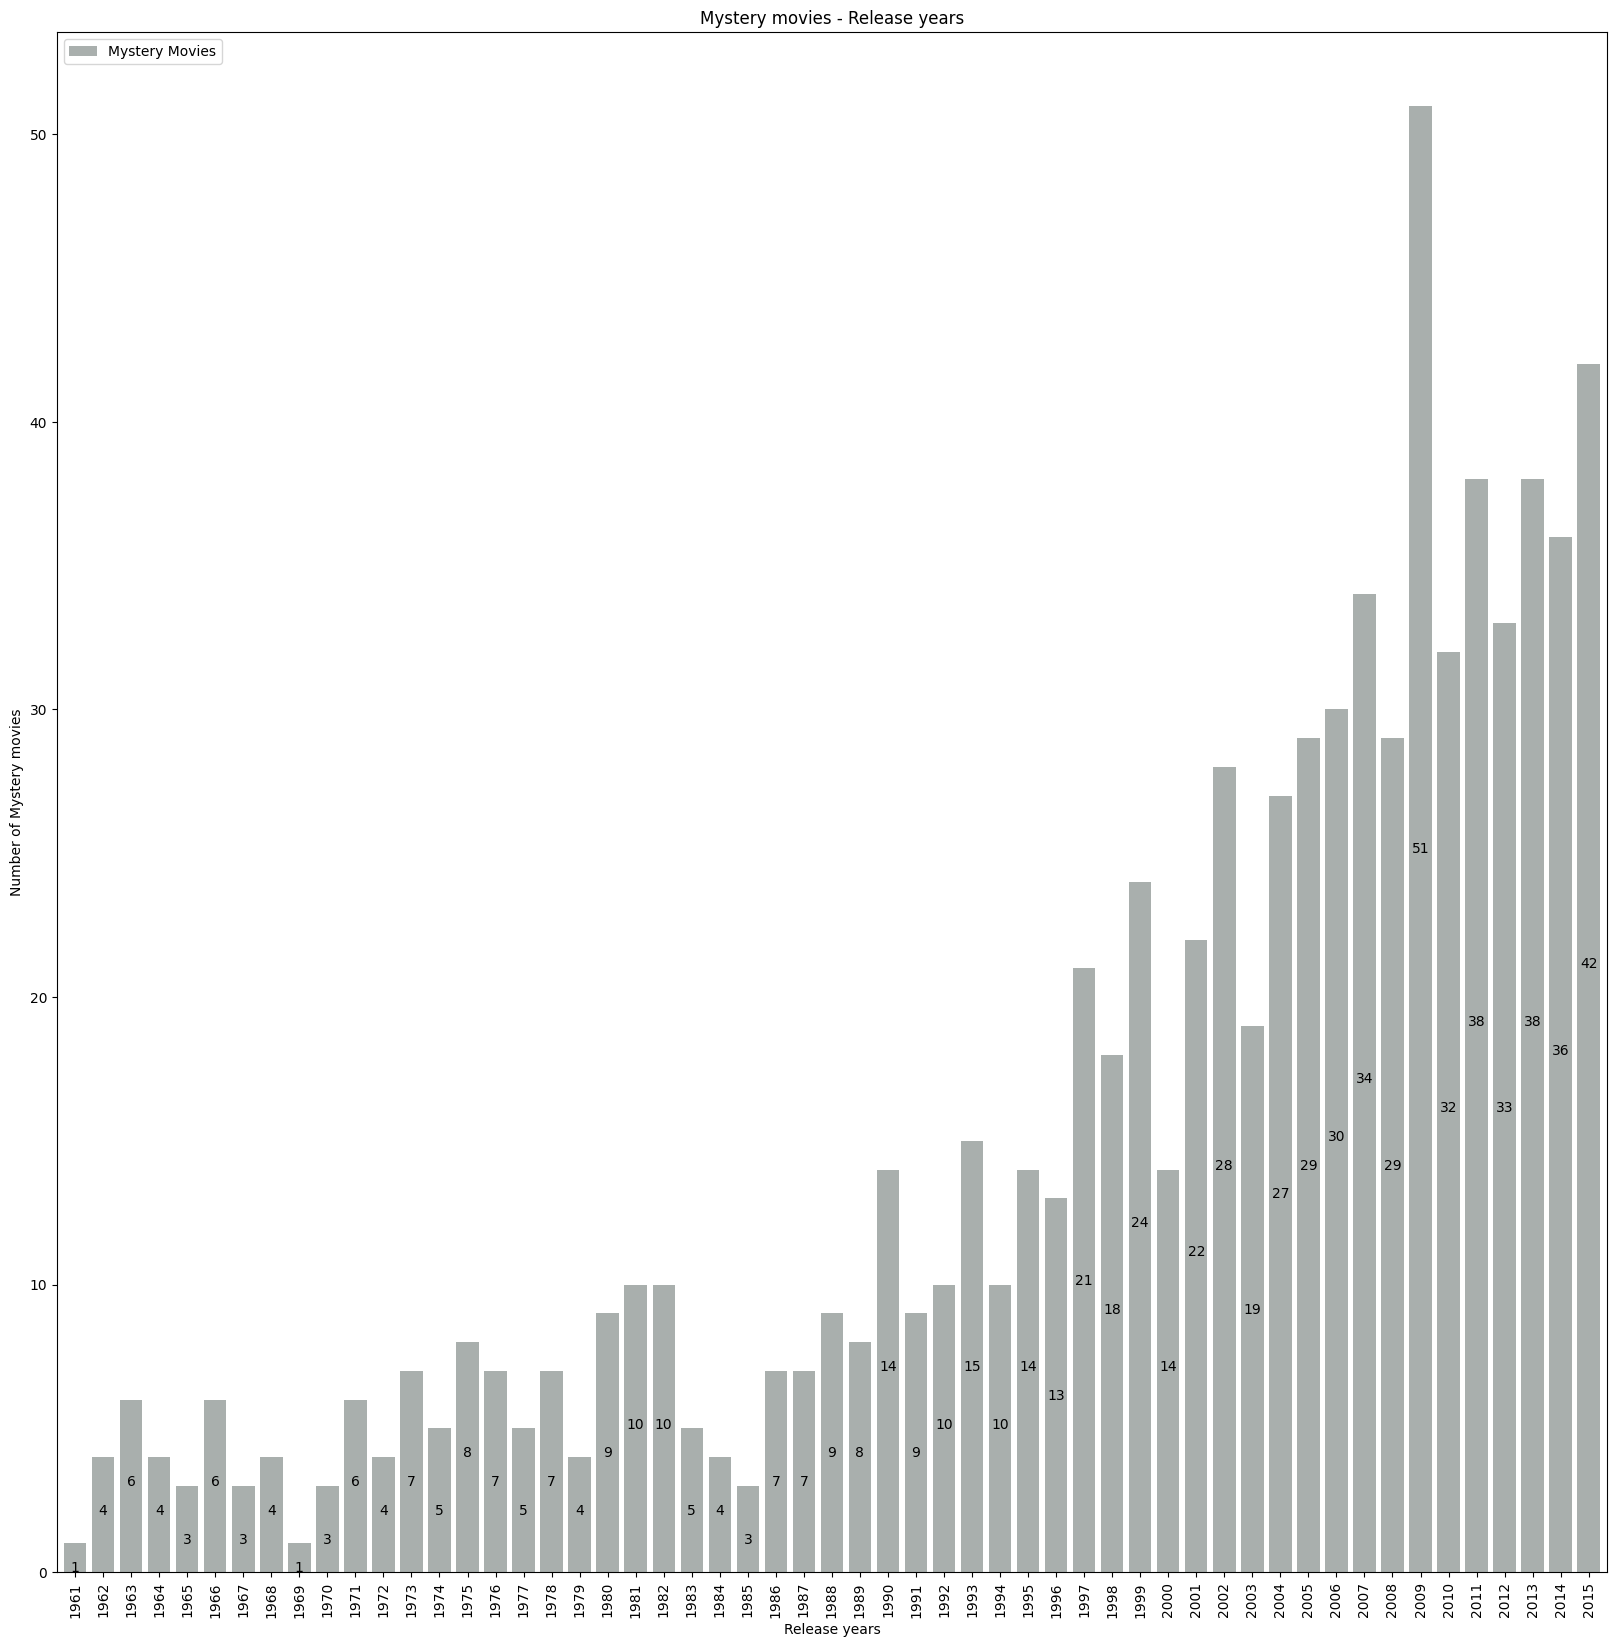

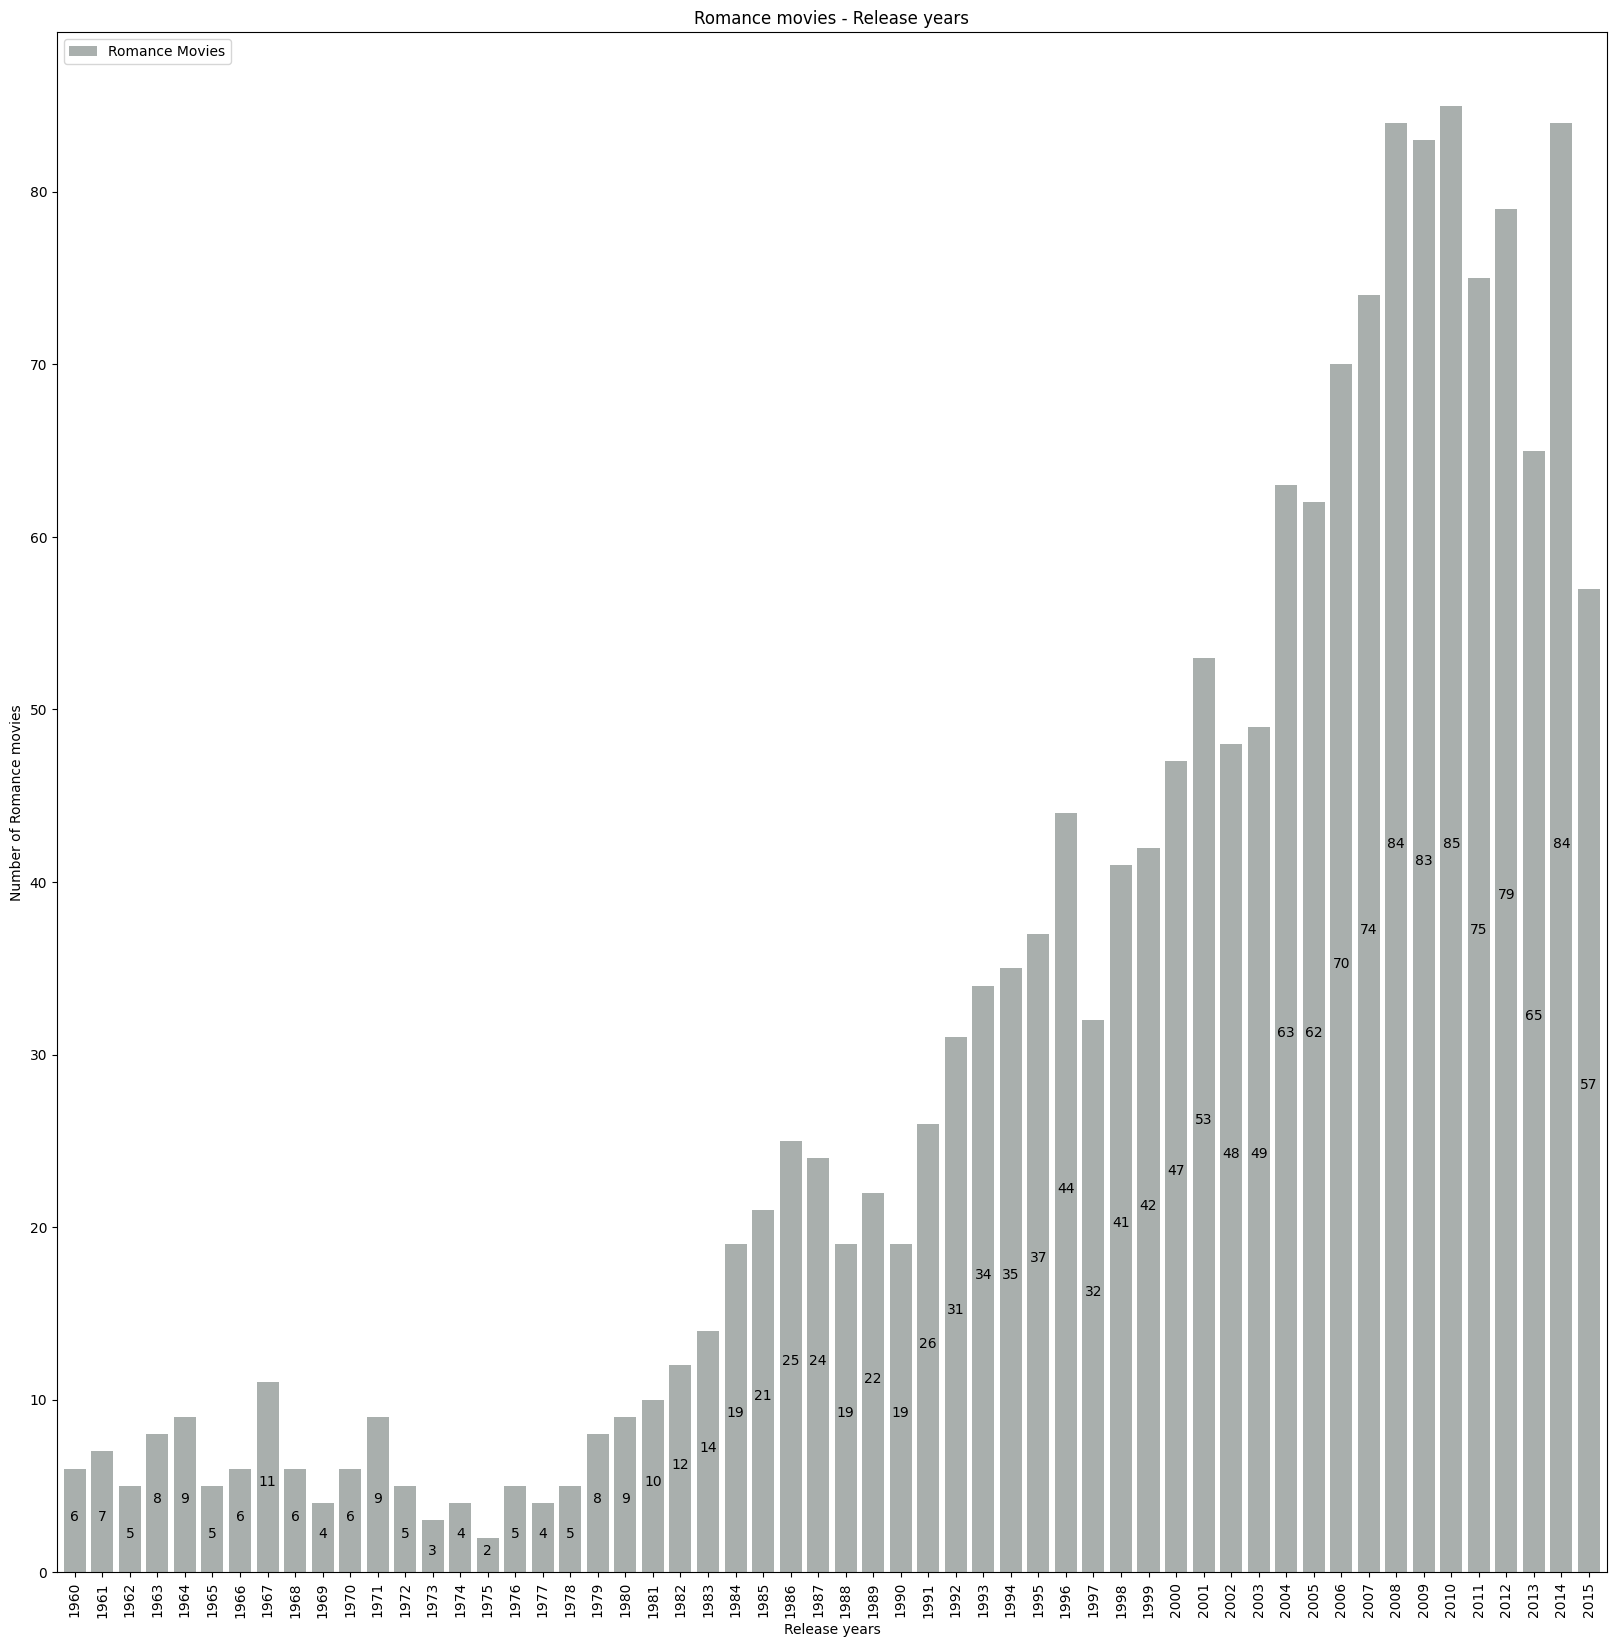

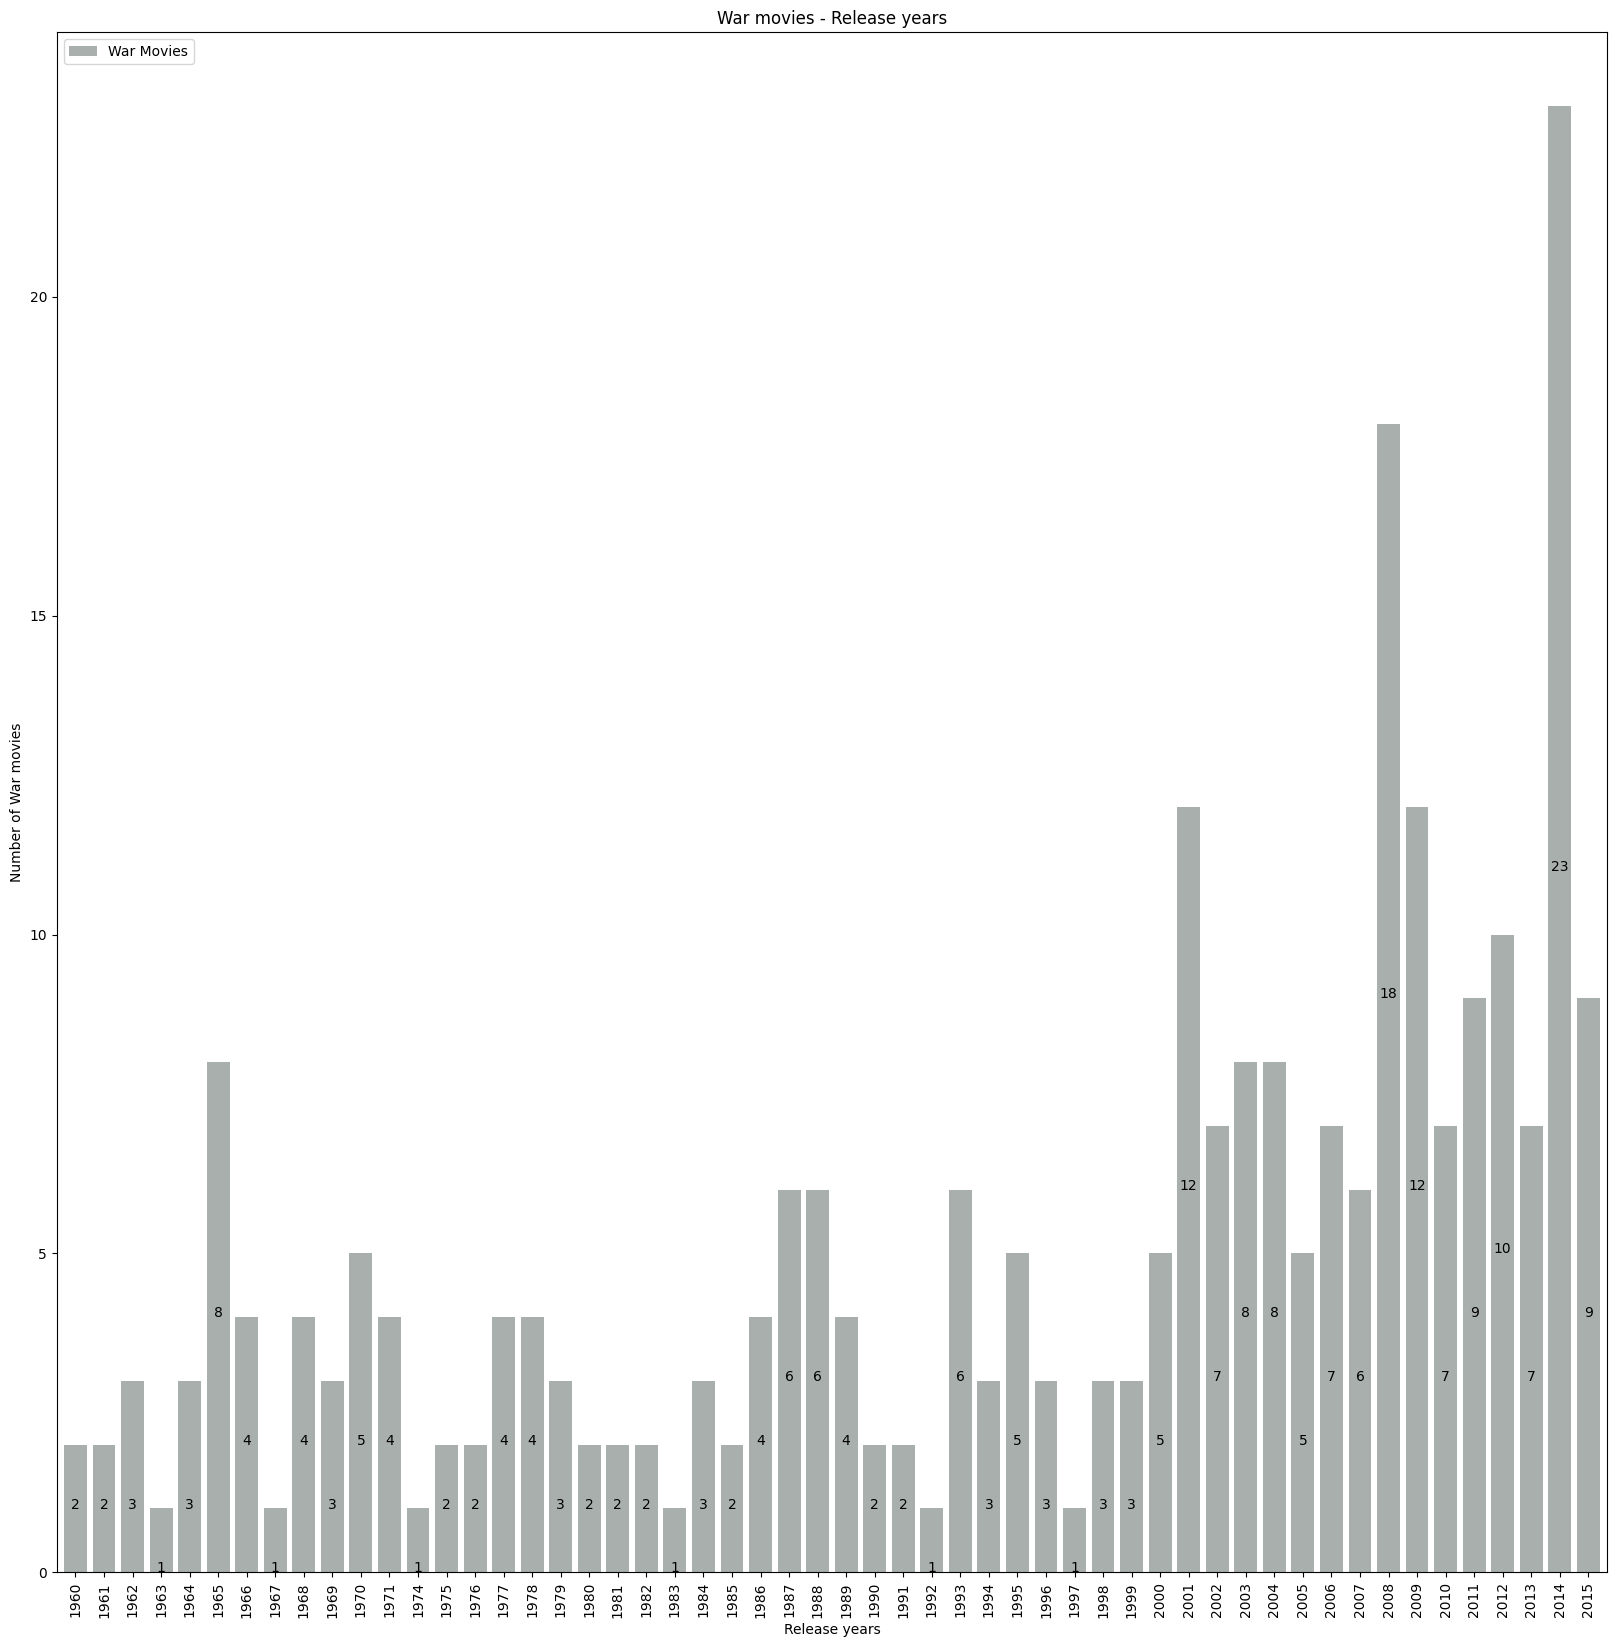

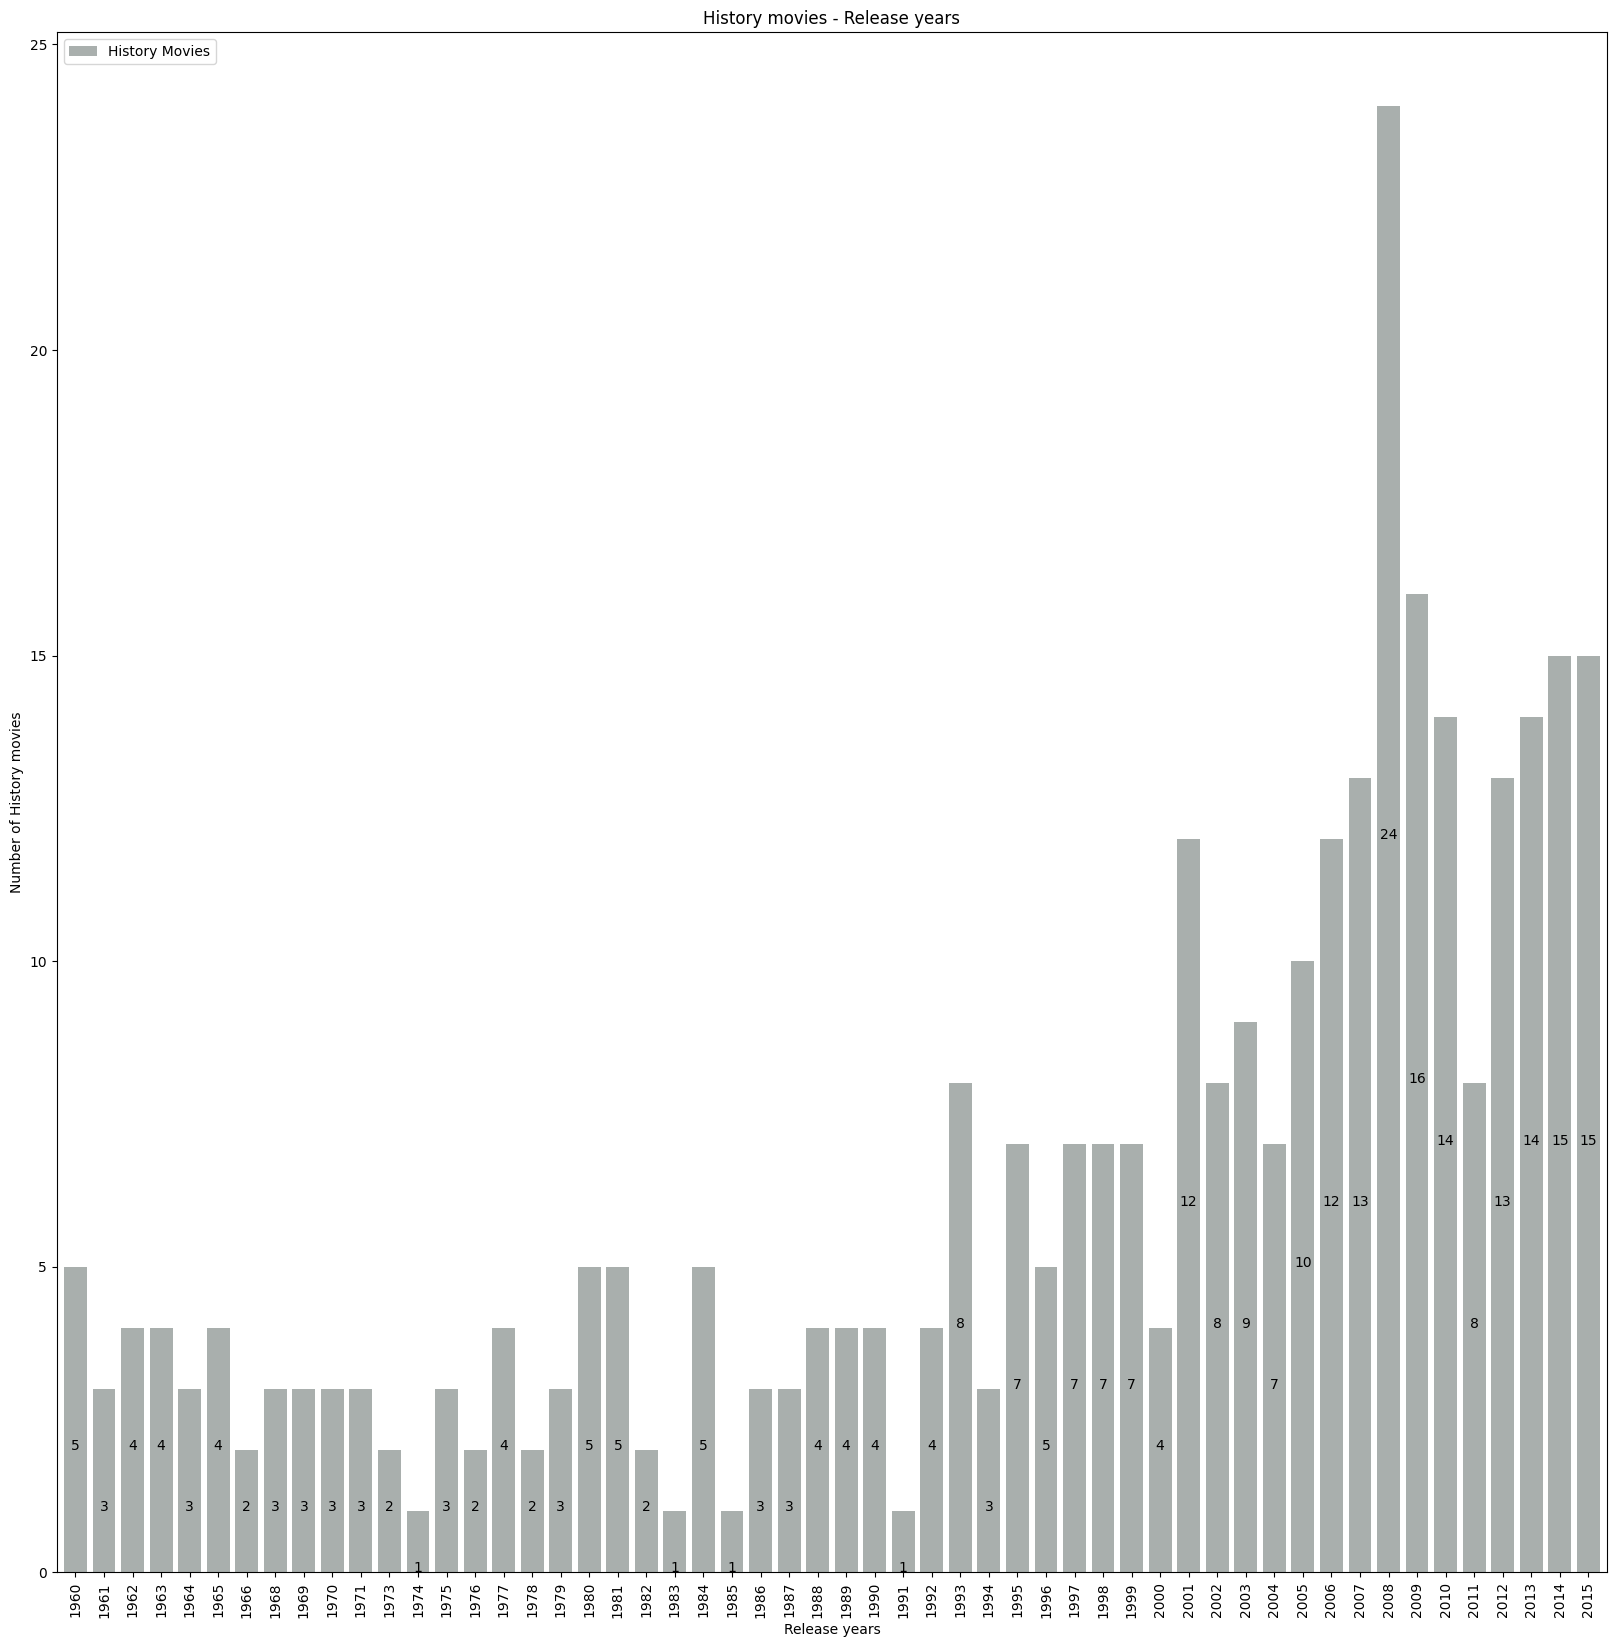

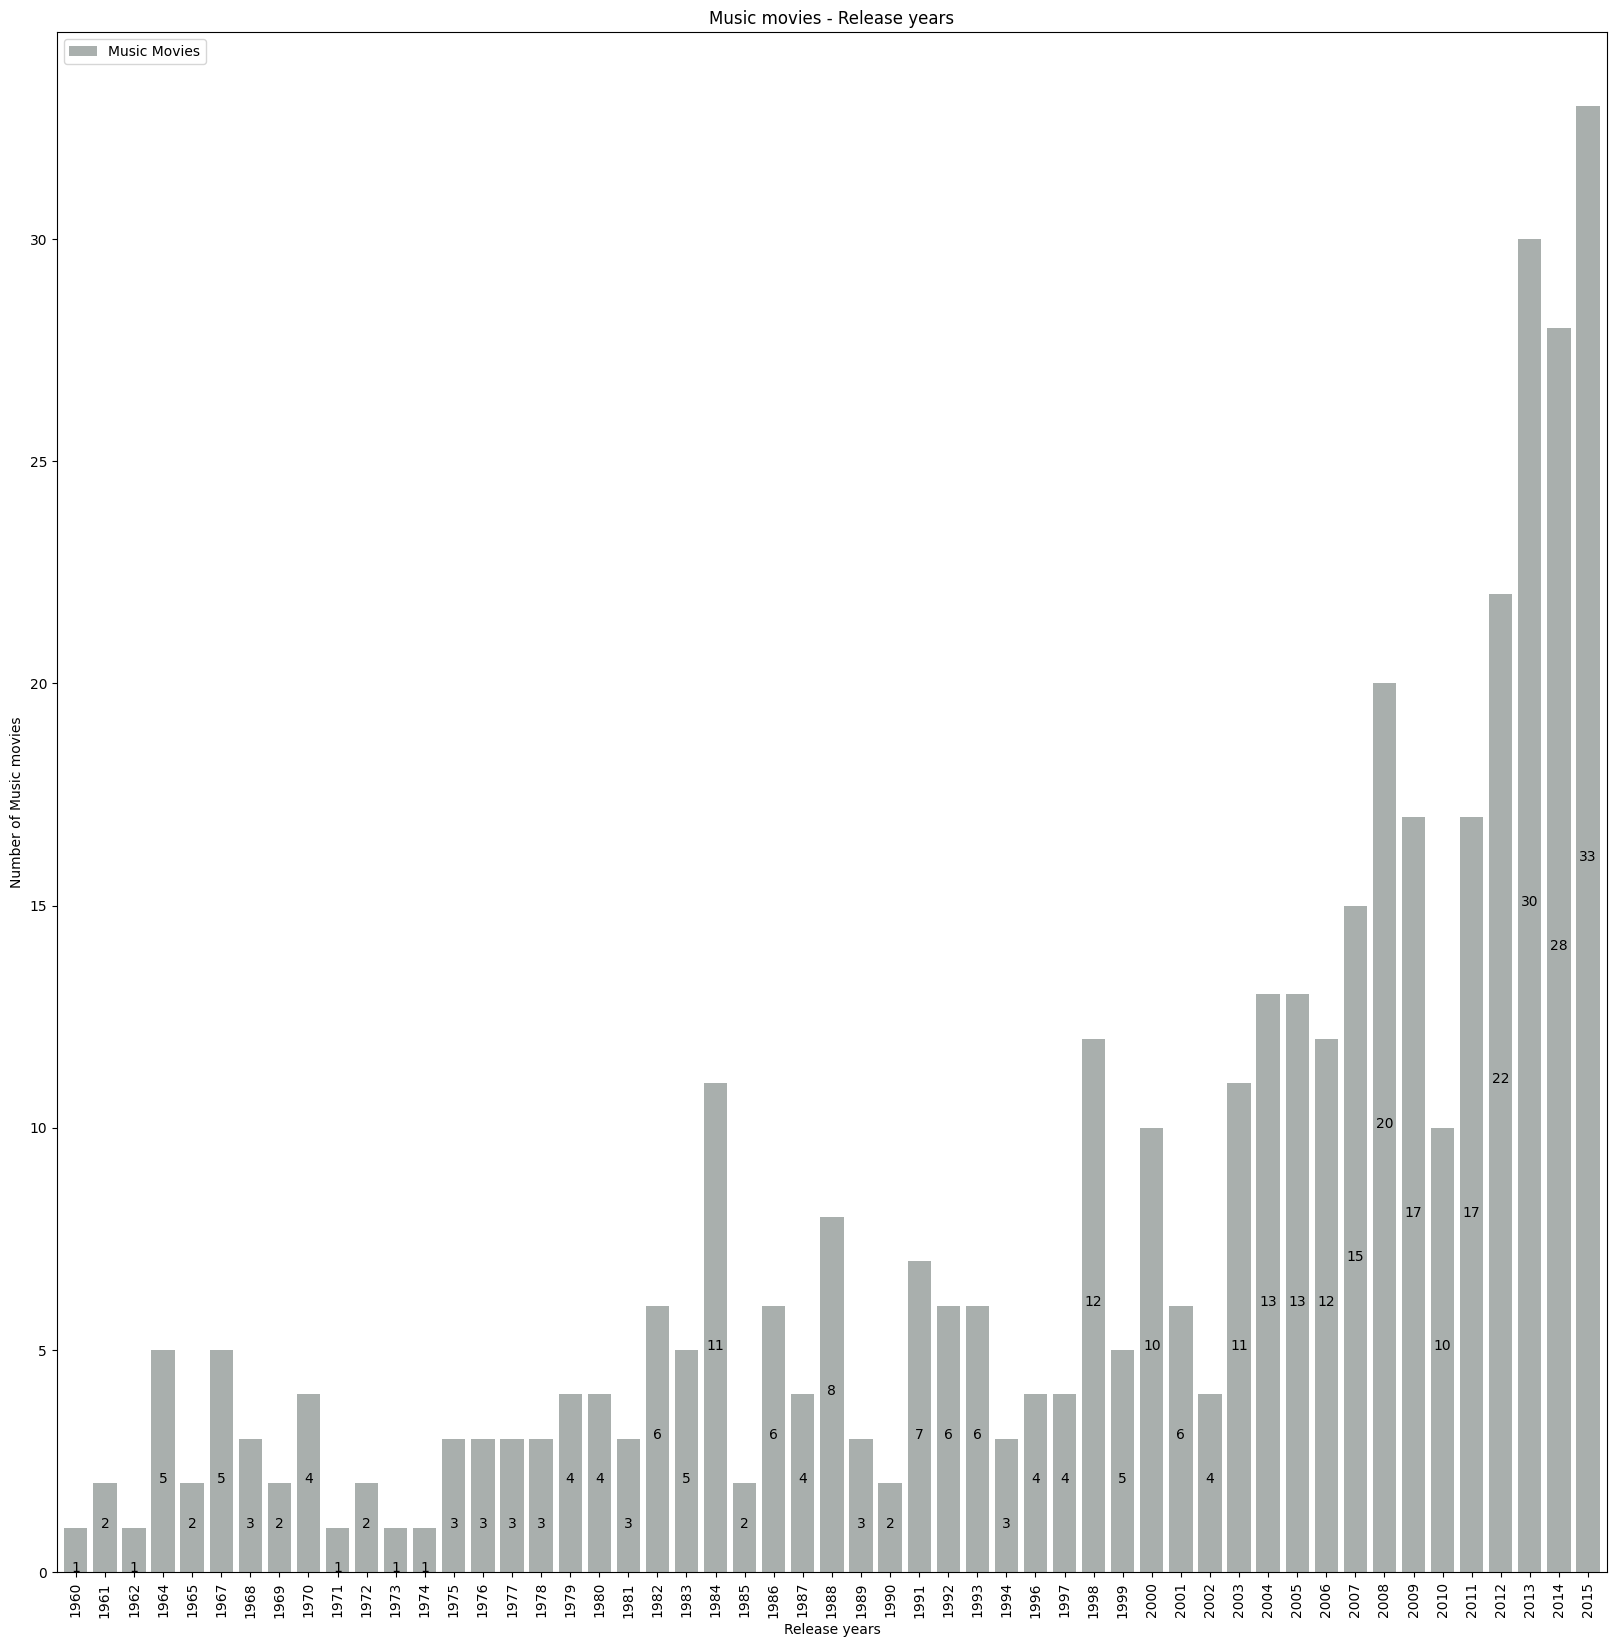

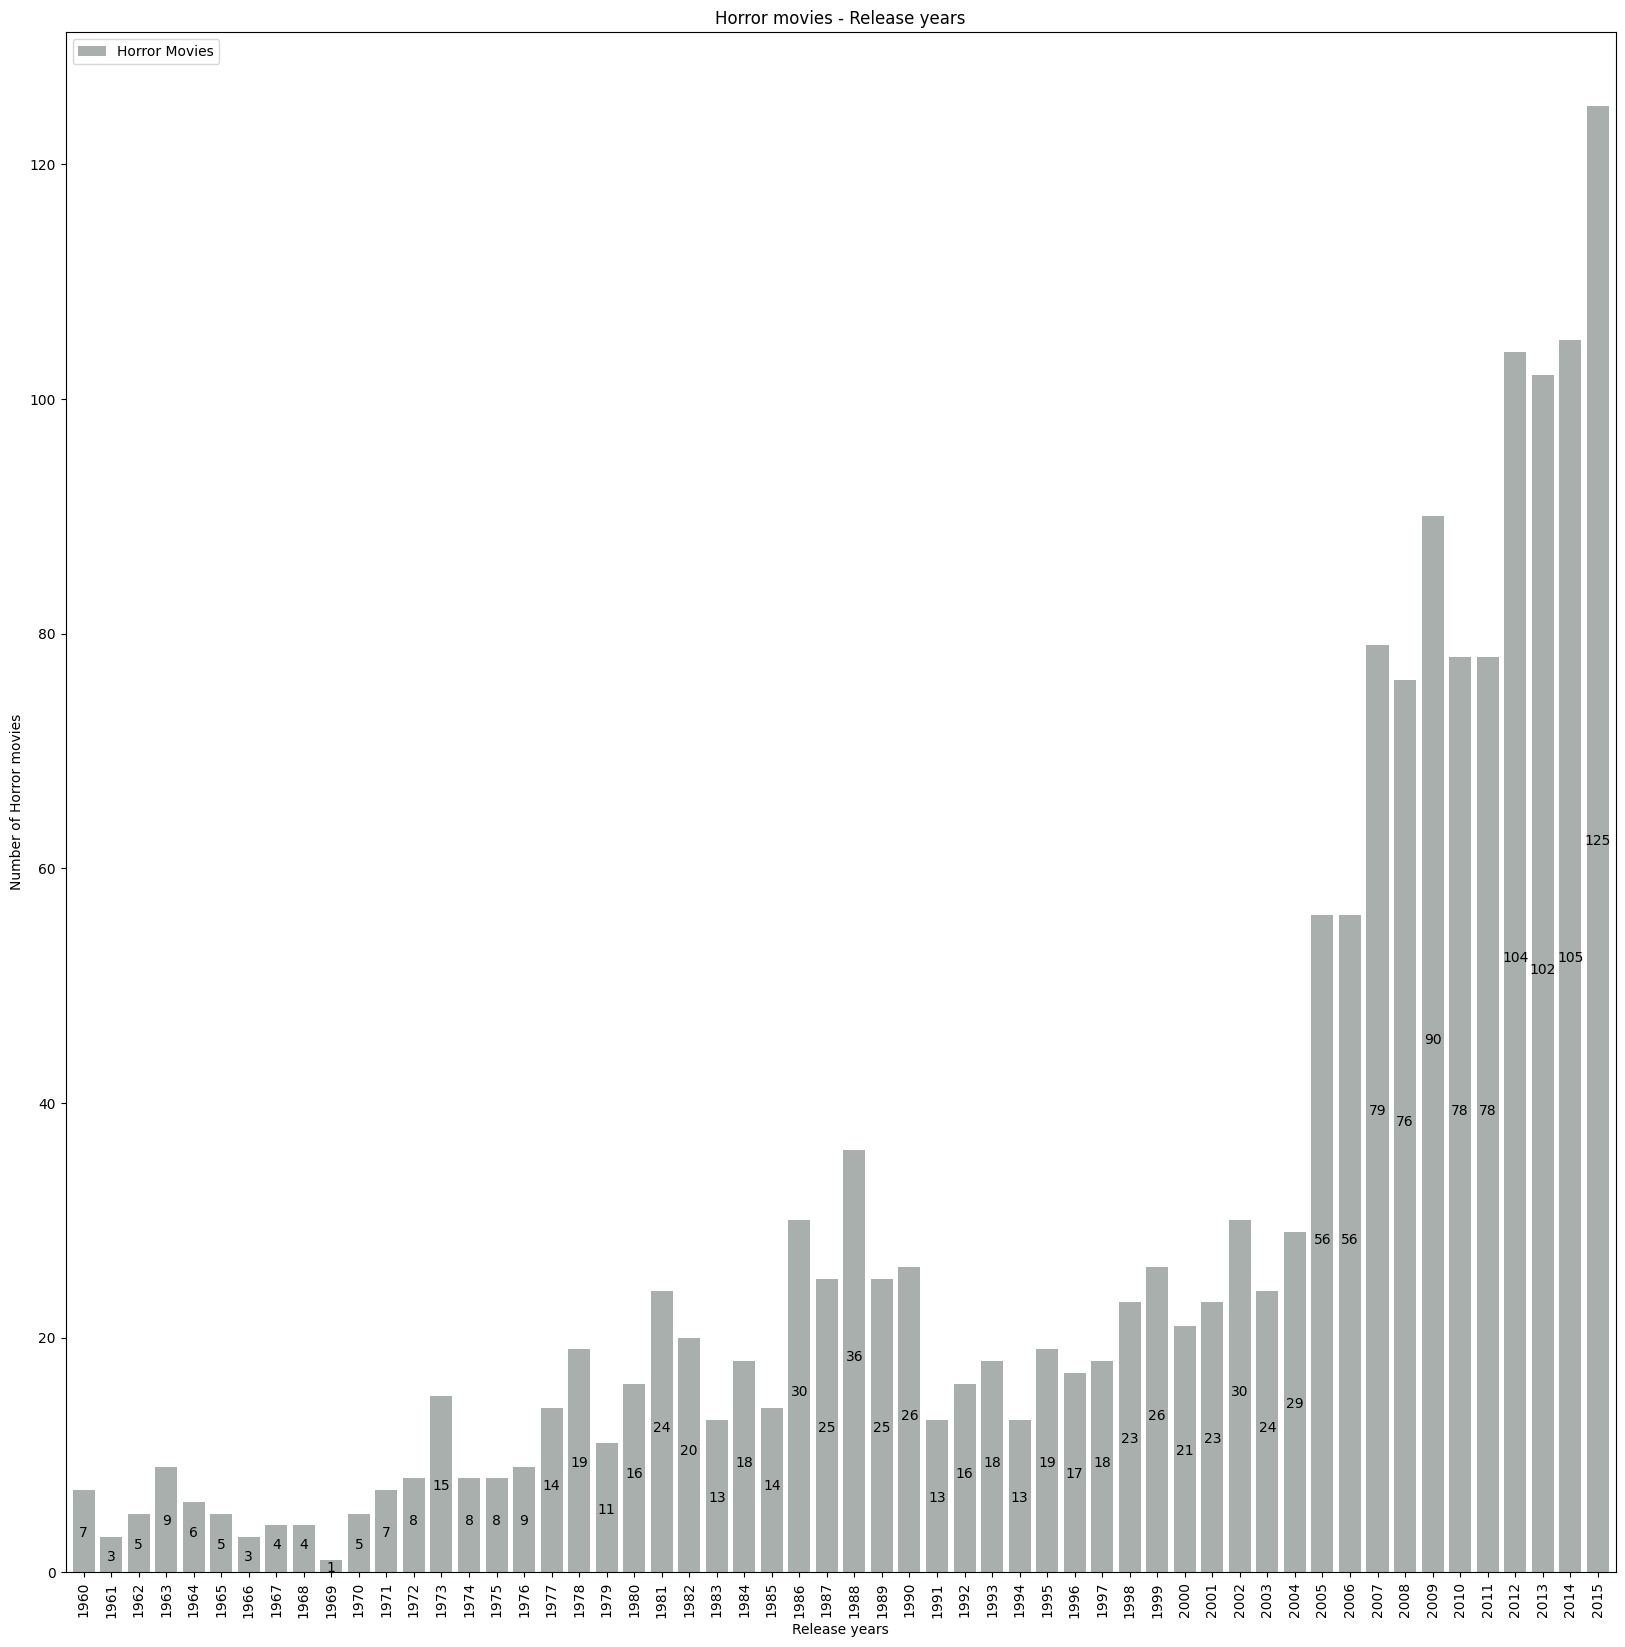

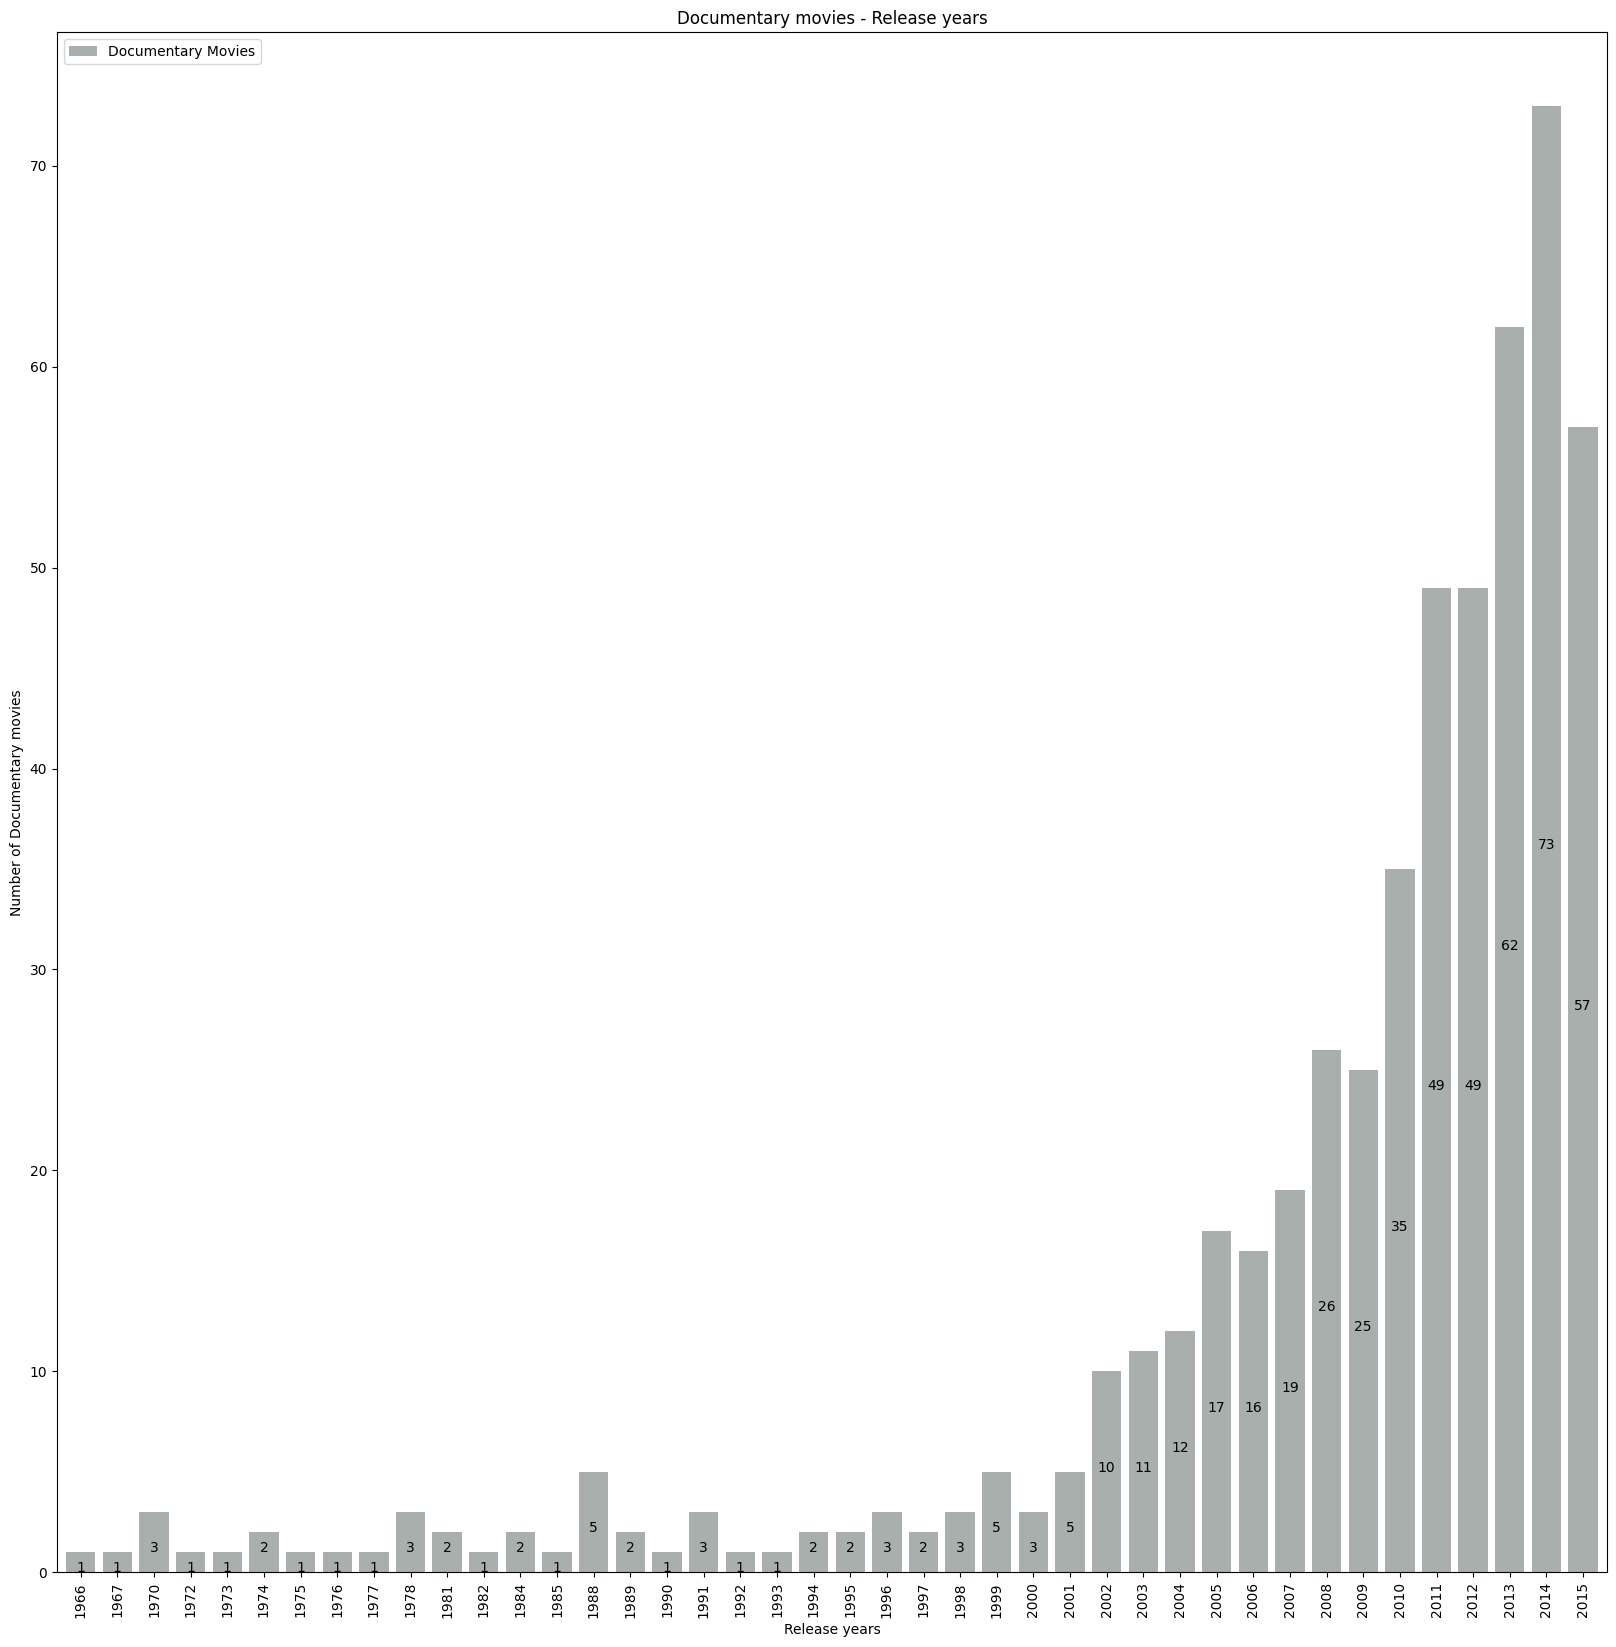

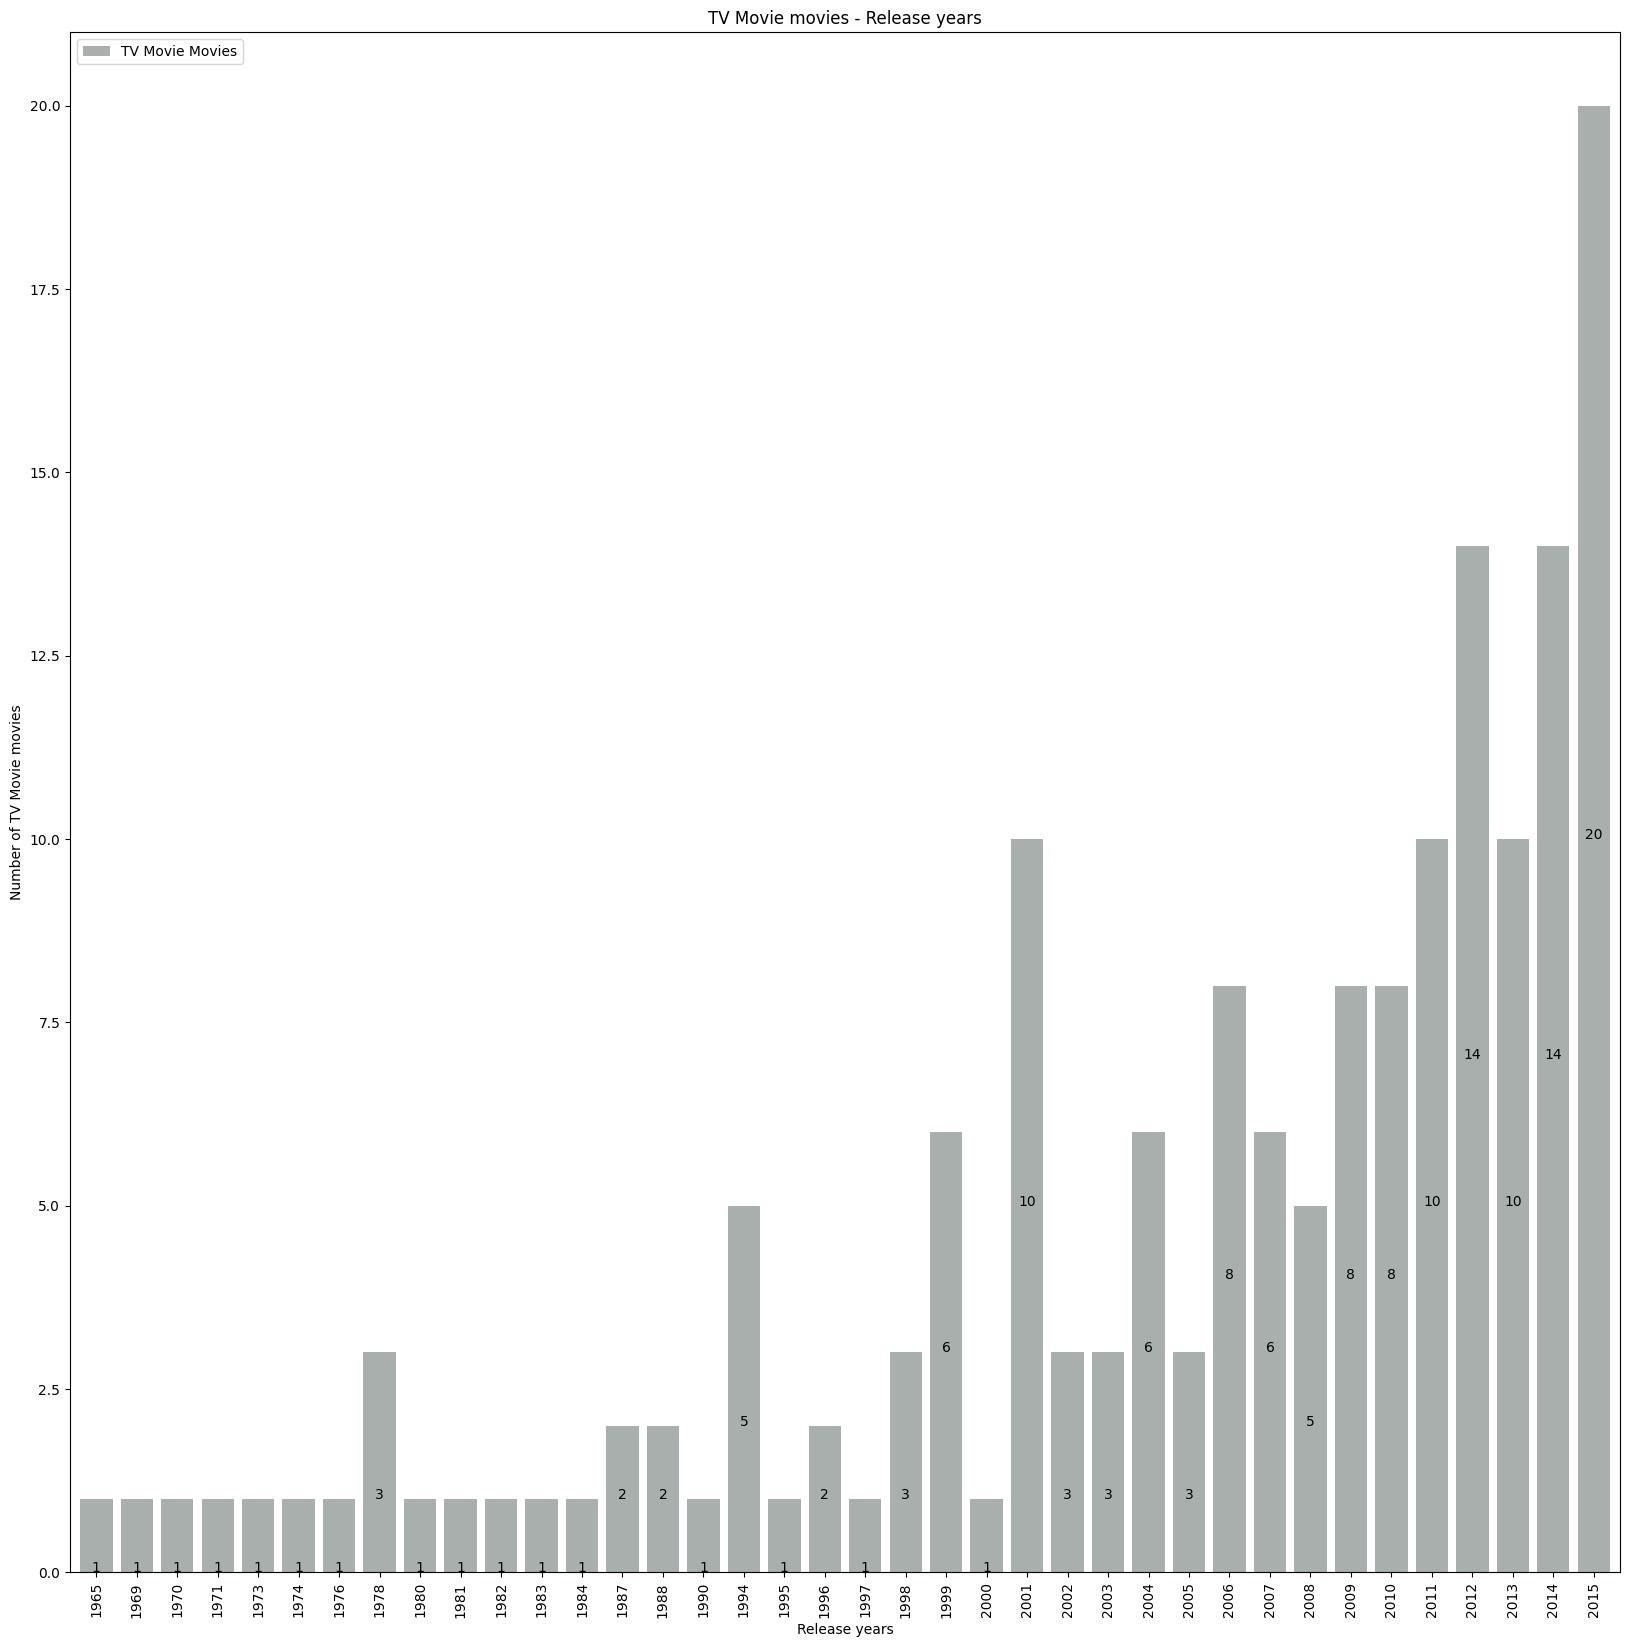

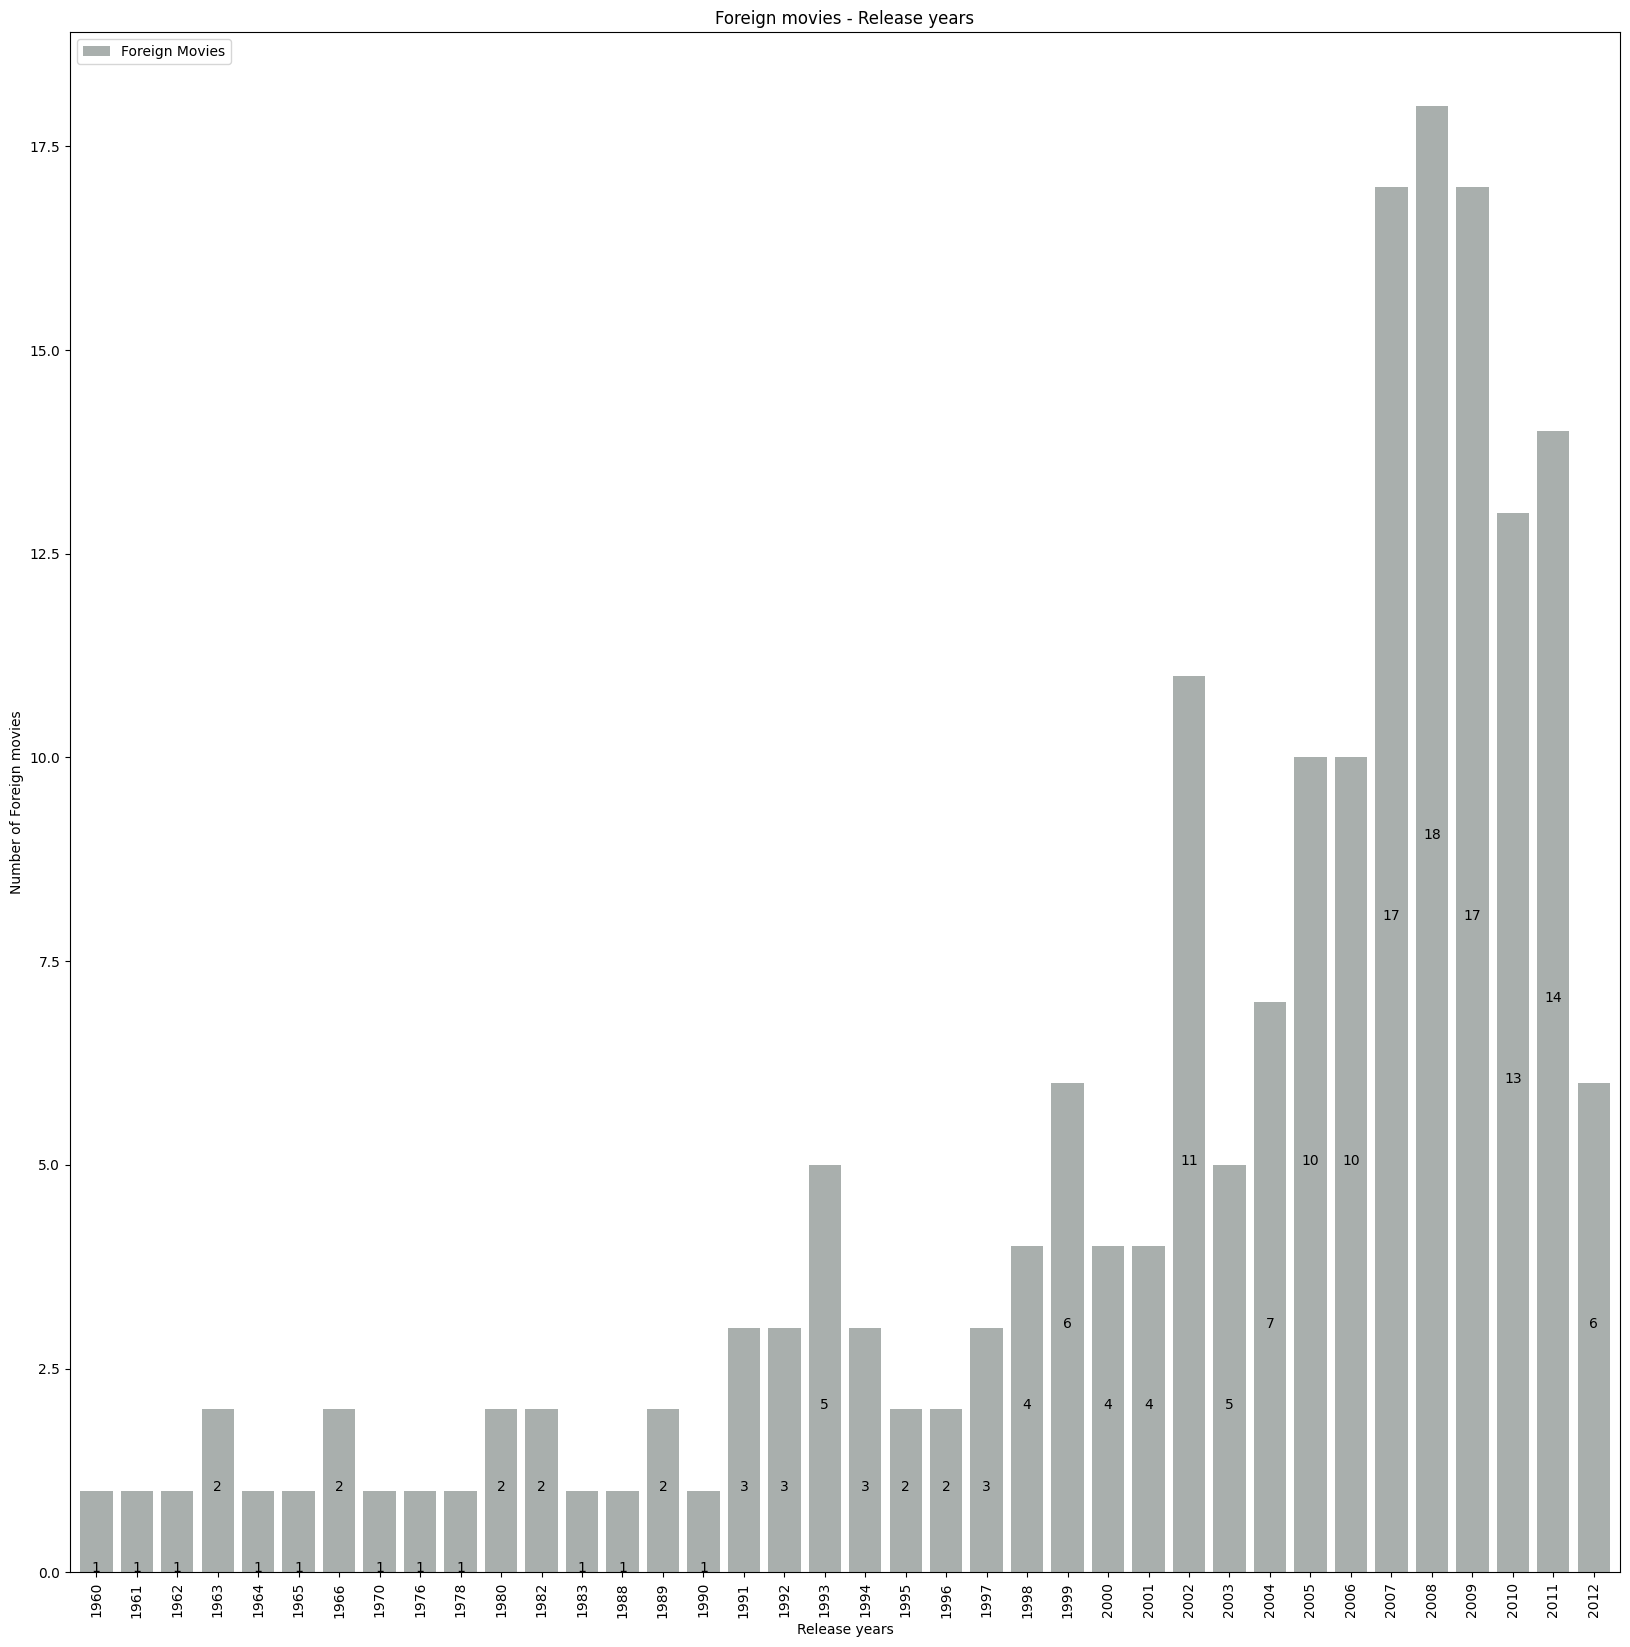

In [19]:
# this definition of a function is available on: https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/ , I reused it here.
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

for i in list_1a:
    vals = []
    df_2a = df_part('release_year', i, list_years)
    df_2a.plot(kind = 'bar', figsize = (20, 20), width=0.8, color = (0.166, 0.224, 0.204, 0.4), xlabel = 'Release years', ylabel = f'Number of {i} movies', title = f'{i} movies - Release years')
    plt.legend([f'{i} Movies'], loc = 'upper left')
    # producing a list of values to render in the box plot ...
    for j in list(df_2a[i].index.get_level_values(0)):
        vals.append(df_2a[i][j])
    # adding the values as labels ...
    addlabels(list(df_2a[i].index.get_level_values(0)), vals)
    

#### Answer: from the plots we have plotted, we can see that for:

In [20]:
# here, we print the most popular genre for each year, along with its number.

for i in list_years:
    list_compare = []
    dict_compare = {}
    for j in list_1a:
        df_part('release_year', j, list_years)
        if i in list(df_part('release_year', j, list_years)[j].index.get_level_values(0)):
            list_compare.append(df_part('release_year', j, list_years)[j][i])
            dict_compare[j] = df_part('release_year', j, list_years)[j][i]
    # finally, print the following formatted string.
    print(f'* For {i}, the most common genre is {str(max(dict_compare, key=dict_compare.get))} of value {str(max(list_compare))}.')

* For 1960, the most common genre is Drama of value 13.
* For 1961, the most common genre is Drama of value 16.
* For 1962, the most common genre is Drama of value 21.
* For 1963, the most common genre is Drama of value 13.
* For 1964, the most common genre is Drama of value 20.
* For 1965, the most common genre is Drama of value 20.
* For 1966, the most common genre is Drama of value 16.
* For 1967, the most common genre is Comedy of value 17.
* For 1968, the most common genre is Drama of value 20.
* For 1969, the most common genre is Drama of value 13.
* For 1970, the most common genre is Drama of value 19.
* For 1971, the most common genre is Drama of value 30.
* For 1972, the most common genre is Drama of value 16.
* For 1973, the most common genre is Drama of value 31.
* For 1974, the most common genre is Drama of value 21.
* For 1975, the most common genre is Drama of value 17.
* For 1976, the most common genre is Drama of value 22.
* For 1977, the most common genre is Drama of v

### The code above prints the following:

* For 1960, the most common genre is Drama of value 13.
* For 1961, the most common genre is Drama of value 16.
* For 1962, the most common genre is Drama of value 21.
* For 1963, the most common genre is Drama of value 13.
* For 1964, the most common genre is Drama of value 20.
* For 1965, the most common genre is Drama of value 20.
* For 1966, the most common genre is Drama of value 16.
* For 1967, the most common genre is Comedy of value 17.
* For 1968, the most common genre is Drama of value 20.
* For 1969, the most common genre is Drama of value 13.
* For 1970, the most common genre is Drama of value 19.
* For 1971, the most common genre is Drama of value 30.
* For 1972, the most common genre is Drama of value 16.
* For 1973, the most common genre is Drama of value 31.
* For 1974, the most common genre is Drama of value 21.
* For 1975, the most common genre is Drama of value 17.
* For 1976, the most common genre is Drama of value 22.
* For 1977, the most common genre is Drama of value 24.
* For 1978, the most common genre is Drama of value 29.
* For 1979, the most common genre is Drama of value 30.
* For 1980, the most common genre is Drama of value 32.
* For 1981, the most common genre is Drama of value 32.
* For 1982, the most common genre is Drama of value 33.
* For 1983, the most common genre is Drama of value 35.
* For 1984, the most common genre is Drama of value 40.
* For 1985, the most common genre is Comedy of value 51.
* For 1986, the most common genre is Drama of value 51.
* For 1987, the most common genre is Comedy of value 57.
* For 1988, the most common genre is Comedy of value 69.
* For 1989, the most common genre is Comedy of value 63.
* For 1990, the most common genre is Drama of value 60.
* For 1991, the most common genre is Drama of value 63.
* For 1992, the most common genre is Drama of value 65.
* For 1993, the most common genre is Drama of value 90.
* For 1994, the most common genre is Comedy of value 88.
* For 1995, the most common genre is Drama of value 93.
* For 1996, the most common genre is Drama of value 104.
* For 1997, the most common genre is Drama of value 83.
* For 1998, the most common genre is Drama of value 108.
* For 1999, the most common genre is Drama of value 113.
* For 2000, the most common genre is Drama of value 101.
* For 2001, the most common genre is Comedy of value 101.
* For 2002, the most common genre is Drama of value 130.
* For 2003, the most common genre is Comedy of value 111.
* For 2004, the most common genre is Drama of value 141.
* For 2005, the most common genre is Drama of value 182.
* For 2006, the most common genre is Drama of value 197.
* For 2007, the most common genre is Drama of value 197.
* For 2008, the most common genre is Drama of value 233.
* For 2009, the most common genre is Drama of value 224.
* For 2010, the most common genre is Drama of value 210.
* For 2011, the most common genre is Drama of value 214.
* For 2012, the most common genre is Drama of value 232.
* For 2013, the most common genre is Drama of value 253.
* For 2014, the most common genre is Drama of value 284.
* For 2015, the most common genre is Drama of value 260.

#### We can conclude that Drama is the most common movie genre overall, and has dominated early TV.
#### Comedy was also a very good competitor from 1985 to around 2003.
#### We can also conclude that with the rising number of Drama movies over the time interval, we can say that TV has gotten extremely popular and might've reached its peak at 2014 only dropping a bit during 2015.

## Second question:
#### Does runtime affect the movie's revenues?

#### For this one, we need to isolate our two columns 'runtime' and 'revenue_adj'. Then get the mean for each group of runtime, which will give us a rough idea for our question.
##### (runtime is measured in minutes and revenue_adj accounts for inflation.)

#### However, let's check for outliers.

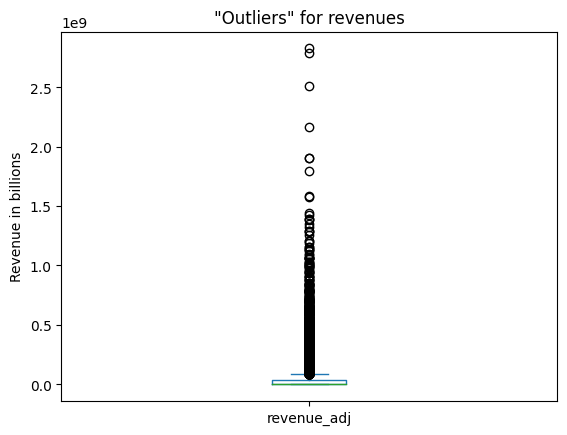

In [21]:
df['revenue_adj'].plot(kind = 'box', ylabel = 'Revenue in billions', title = '"Outliers" for revenues');

#### Apparently most movies flop which gives us a ton of outliers. 

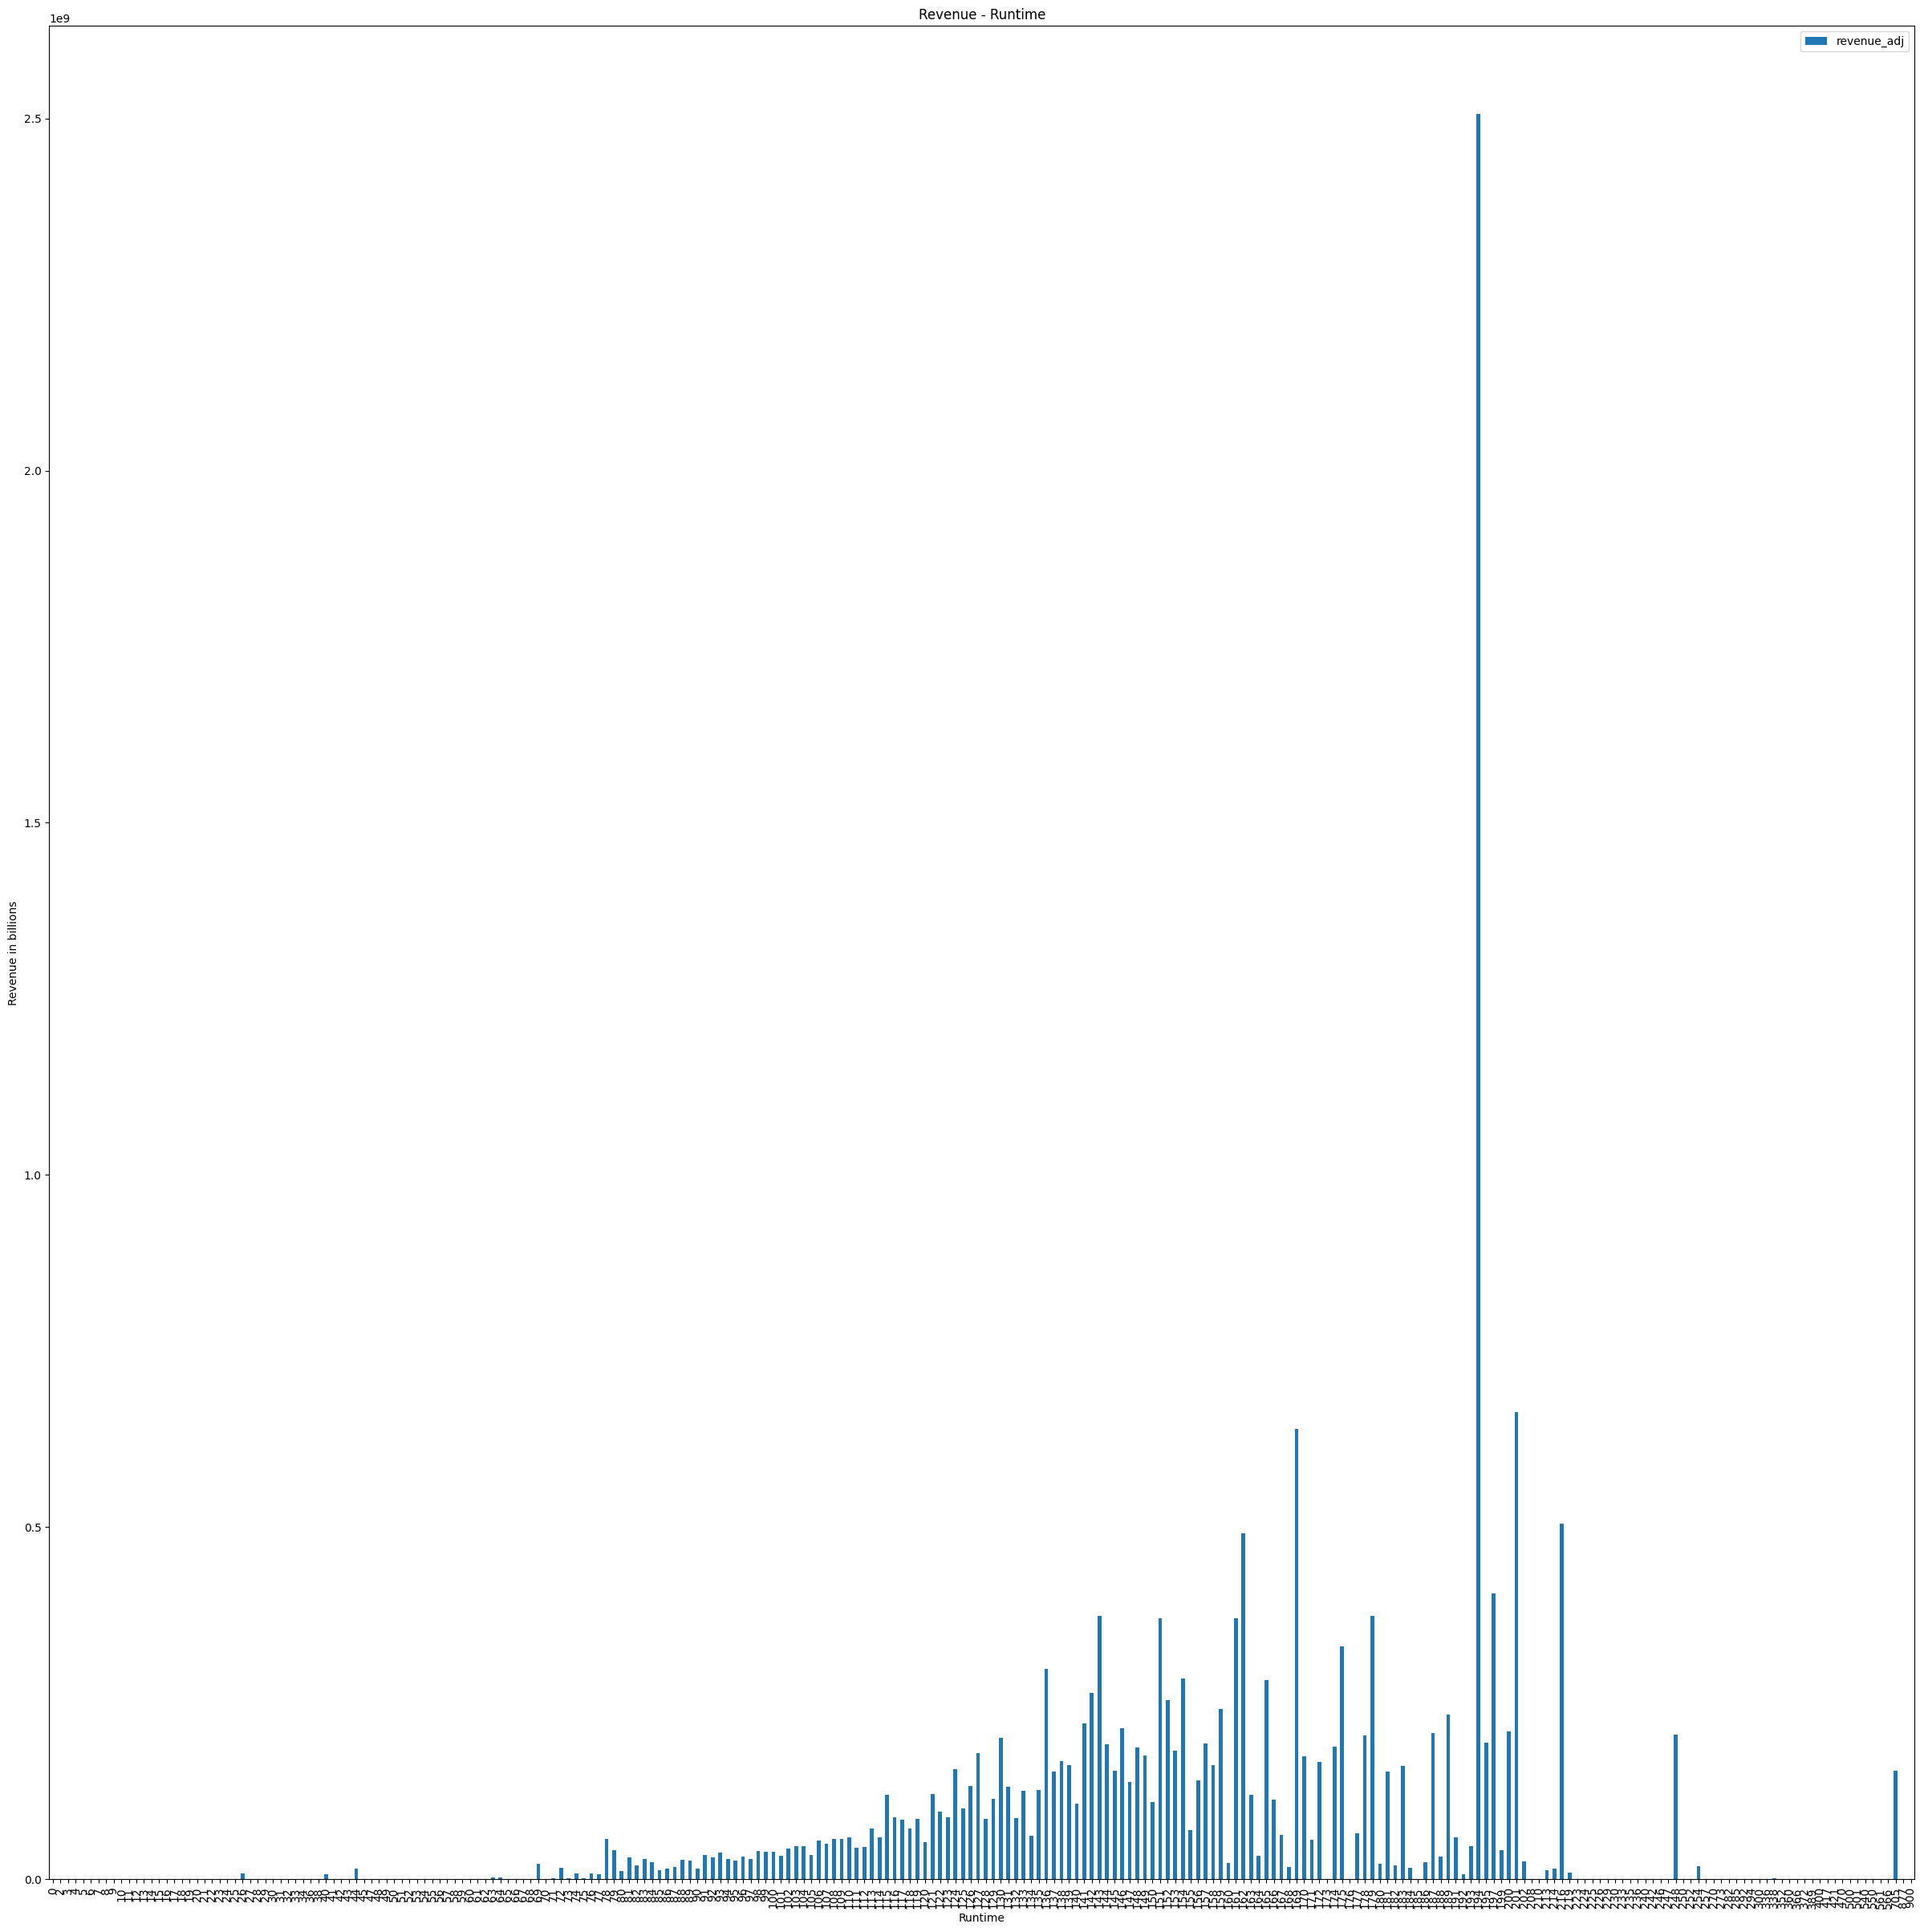

In [22]:
# the y-values are measured in billions.
pd.DataFrame(df.groupby('runtime')['revenue_adj'].mean()).plot(kind = 'bar', figsize = (30, 30), xlabel = 'Runtime', ylabel = 'Revenue in billions', title = 'Revenue - Runtime');

In [23]:
#identifying what value that large spike (apparent outlier) is ...
df.groupby('runtime')['revenue_adj'].mean().max()

2506405735.41947

#### Now, this is a very rough plot, many values are plotted on the x-axis and so you don't get a good look at the x-values. However, the plot is very clear, and we'll be making use of this in our answer. First, we see that for values of runtime under a certain value, these movies got almost no revenue, and for above that certain value, we see a very positive correlation between runtime and revenue.
#### This trend doesn't continue on for long though. Eventually, the revenue approaches zero steadily once again except for a few outliers which I think are probably related to documentaries and large movie productions that are very hyped up and has a good marketing team.
#### Now, let's call the values that are at the bounds of the region where there is positive correlation $t_a$ (lower bound) and $t_b$ (upper bound). We see that for values:
* $t < t_a$ we use our observations to quantify this and we get that the revenue $r \to 0$ (approaches zero).
* $t_a < t < t_b$, the revenue $r$ has a positive correlation and is expected to rise (almost) regularly until $t_b$.
* $t > t_b$, the revenue $r$ has a negative correlation (which is true for most of the movies in that interval, except a few outliers) and swiftly approaches zero ($r \to 0$).

#### We can tell what $t_a$ and $t_b$ are by inspecting the plot, which is definitely hard, but, by inspection:
* $t_a$ is around the 80 mark.
* $t_b$ is around the 152 mark.

### So, for optimal revenue, assuming the movie's theme, marketing strategies and whatnot are optimised, your movie's runtime should fall in the $(80, 152)$ minute interval.

<a id='conclusions'></a>
## Conclusions

### Finally, at the end of our two questions, we can conclude that for a movie to be successful it might have two criteria to fill:
* It might have to be a Drama film/movie. Reasoning behind this is most movies and films are of genre 'Drama', we can conclude that most production companies (including very very big ones) produce mostly Drama films.
* And it has to fall in the 80 to 152 minute interval for its runtime. Reasoning behind this is we notice a slight positive correlation between runtime and revenue in our graph/plot, which leads us to think that on average, people are more likely to watch a movie or film if its runtime doesn't exceed 2.53 hours (152 minutes) and doesn't fall beneath 1.3 hours (80 minutes) and ideally is inside that region, not teetering on the edge of it.

### That doesn't always mean success for our movie or film, but it does have a slight effect.

### We also have to recognise the limitations of this analysis. If we wanted to analyse production companies, you might want to seperate them (they're in a pipe-separated format), for which case you would get many many many more values than when we did that to genres, which would take much more time to analyse. We also state that point for analysing directors.
### With revenue vs runtime, the plot we produced is very very full of values, which makes it hard to analyse it.